## Churn Score


 ### Data Understanding and Exploration
 - Let's first import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
# Importing required python libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

# Ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set max to see the full text
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 226)
pd.options.display.max_columns = None

In [3]:
# Loading and reading the data
df=pd.read_csv("telecom_churn_data.csv",low_memory=False)


In [5]:
# Viewing the dataset
df.head(2).T.to_csv("test.csv")


In [5]:
# Finding no. of rows present in the dataset
rows=len(df.index)
print(rows)

99999


In [6]:
# Getting the information about dataframes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [7]:
# Check the data types for all the columns
print(df.dtypes)

mobile_number               int64  
circle_id                   int64  
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object 
last_date_of_month_7        object 
last_date_of_month_8        object 
last_date_of_month_9        object 
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float64
roam_og_mou_6               float64
roam_og_mou_7               float64
roam_og_mou_8               

In [8]:
# Confirming if the Mobile Number is the unique and can act as a primary key
print("Id Count-",df["mobile_number"].count())
print("Unique Count-",len(df["mobile_number"].unique()))

Id Count- 99999
Unique Count- 99999


In [9]:
# Checking missing values in the data set
df.isnull().sum()

mobile_number               0    
circle_id                   0    
loc_og_t2o_mou              1018 
std_og_t2o_mou              1018 
loc_ic_t2o_mou              1018 
last_date_of_month_6        0    
last_date_of_month_7        601  
last_date_of_month_8        1100 
last_date_of_month_9        1659 
arpu_6                      0    
arpu_7                      0    
arpu_8                      0    
arpu_9                      0    
onnet_mou_6                 3937 
onnet_mou_7                 3859 
onnet_mou_8                 5378 
onnet_mou_9                 7745 
offnet_mou_6                3937 
offnet_mou_7                3859 
offnet_mou_8                5378 
offnet_mou_9                7745 
roam_ic_mou_6               3937 
roam_ic_mou_7               3859 
roam_ic_mou_8               5378 
roam_ic_mou_9               7745 
roam_og_mou_6               3937 
roam_og_mou_7               3859 
roam_og_mou_8               5378 
roam_og_mou_9               7745 
loc_og_t2t_mou

In [10]:
# Summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df.isnull().sum()/len(df.index)), 2)

mobile_number               0.00 
circle_id                   0.00 
loc_og_t2o_mou              1.02 
std_og_t2o_mou              1.02 
loc_ic_t2o_mou              1.02 
last_date_of_month_6        0.00 
last_date_of_month_7        0.60 
last_date_of_month_8        1.10 
last_date_of_month_9        1.66 
arpu_6                      0.00 
arpu_7                      0.00 
arpu_8                      0.00 
arpu_9                      0.00 
onnet_mou_6                 3.94 
onnet_mou_7                 3.86 
onnet_mou_8                 5.38 
onnet_mou_9                 7.75 
offnet_mou_6                3.94 
offnet_mou_7                3.86 
offnet_mou_8                5.38 
offnet_mou_9                7.75 
roam_ic_mou_6               3.94 
roam_ic_mou_7               3.86 
roam_ic_mou_8               5.38 
roam_ic_mou_9               7.75 
roam_og_mou_6               3.94 
roam_og_mou_7               3.86 
roam_og_mou_8               5.38 
roam_og_mou_9               7.75 
loc_og_t2t_mou

Observation : ```Many columns have null values for all the rows, hence some bit of data cleaning is required for them```


### Cleaning the data
 - Preprocessing the data and Data cleaning

In [11]:
# Get the columns in which are all values are null
nan_columns=list(df.columns[df.isnull().sum()==rows])
print(nan_columns)


[]


In [12]:
# Check if any row has all the values as null
df.isnull().all(axis=1).sum()

0

In [13]:
# Re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [14]:
# Taking the columns which have high null percentage
cols_to_drop = list(df.columns[round(100*(df.isnull().sum()/len(df.index)), 2)>73])

In [15]:
cols_to_drop

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [16]:
len(cols_to_drop)

40

In [17]:
len(df.columns[100*(df.isnull().sum()/len(df.index))>0])

166

In [18]:
df[cols_to_drop].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count  25153.000000       25571.000000       26339.000000        
mean   2.463802           2.666419           2.651999            
std    2.789128           3.031593           3.074987            
min    1.000000           1.000000           1.000000            
25%    1.000000           1.000000           1.000000            
50%    1.000000           1.000000           1.000000            
75%    3.000000           3.000000           3.000000            
max    61.000000          54.000000          60.000000           

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count  25922.000000       25153.000000     25571.000000     26339.000000      
mean   2.441170           126.393392       126.729459       125.717301        
std    2.516339           108.477235       109.765267       109.437851        
min    1.000000           1.000000         1.000000         1.000000          
25%    1.000000           25.000000        25.000000        25.000000         
50%    2.000000           145.000000       145.000000       145.000000        
75%    3.000000           177.000000       177.000000       179.000000        
max    84.000000          1555.000000      1555.000000      1555.000000       

       max_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count  25922.00000      25153.000000     25571.000000     26339.000000      
mean   124.94144        1.864668         2.044699         2.016288          
std    111.36376        2.570254         2.768332         2.720132          
min    1.00000          0.000000         0.000000         0.000000          
25%    25.00000         1.000000         1.000000         1.000000          
50%    145.00000        1.000000         1.000000         1.000000          
75%    179.00000        2.000000         2.000000         2.000000          
max    1555.00000       42.000000        48.000000        44.000000         

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count  25922.000000     25153.000000     25571.000000     26339.000000      
mean   1.781807         0.599133         0.621720         0.635711          
std    2.214701         1.274428         1.394524         1.422827          
min    0.000000         0.000000         0.000000         0.000000          
25%    1.000000         0.000000         0.000000         0.000000          
50%    1.000000         0.000000         0.000000         0.000000          
75%    2.000000         1.000000         1.000000         1.000000          
max    40.000000        29.000000        35.000000        45.000000         

       count_rech_3g_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count  25922.000000     25153.000000        25571.000000         
mean   0.659363         192.600982          200.981292           
std    1.411513         192.646318          196.791224           
min    0.000000         1.000000            0.500000             
25%    0.000000         82.000000           92.000000            
50%    0.000000         154.000000          154.000000           
75%    1.000000         252.000000          252.000000           
max    49.000000        7546.000000         4365.000000          

       av_rech_amt_data_8  av_rech_amt_data_9     arpu_3g_6     arpu_3g_7  \
count  26339.000000        25922.000000        25153.000000  25571.000000   
mean   197.526489          192.734315          89.555057     89.384120      
std    191.301305          188.400286          193.124653    195.893924     
min    0.500000            1.000000           -30.820000    -26.040000      
25%    87.000000           69.000000           0.000000      0.000000       
50%    154.000000          164.000000          0.480000      0.420000       
75%    252.000000          252.000000          122.070000    119.560000     
max    4076.000000         4061.000000         6362.280000   4980.900000    

          arpu_3g_8    

```We need columns related to recharge later to calculate the high end customers```

In [19]:
# Calculating columns related to recharge later
rech_cols=[col for col in cols_to_drop if 'rech' in col]

In [20]:
rech_cols

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

In [21]:
# columns to be used for finding high value customers
rech_cols=[ 
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9']

# We cannot drop these columns ,hence imputing them with 0
df[rech_cols]=df[rech_cols].fillna(0)

In [22]:
# Dropping other high null value columns
cols_to_drop=list(set(cols_to_drop) - set(rech_cols))
cols_to_drop

['total_rech_data_6',
 'date_of_last_rech_data_7',
 'total_rech_data_8',
 'arpu_2g_7',
 'date_of_last_rech_data_6',
 'fb_user_9',
 'arpu_3g_6',
 'max_rech_data_8',
 'max_rech_data_6',
 'arpu_3g_8',
 'night_pck_user_8',
 'arpu_3g_9',
 'night_pck_user_6',
 'fb_user_8',
 'total_rech_data_9',
 'arpu_3g_7',
 'total_rech_data_7',
 'max_rech_data_9',
 'night_pck_user_9',
 'arpu_2g_9',
 'fb_user_7',
 'night_pck_user_7',
 'arpu_2g_6',
 'fb_user_6',
 'date_of_last_rech_data_8',
 'max_rech_data_7',
 'arpu_2g_8',
 'date_of_last_rech_data_9']

### Treating the null values

In [23]:
# Dropping the columns
df = df.drop(cols_to_drop, axis=1)

In [24]:
df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=198)

In [25]:
# Re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

loc_ic_t2t_mou_9        7.75
ic_others_9             7.75
offnet_mou_9            7.75
std_og_t2c_mou_9        7.75
roam_ic_mou_9           7.75
spl_ic_mou_9            7.75
isd_ic_mou_9            7.75
roam_og_mou_9           7.75
loc_og_t2t_mou_9        7.75
og_others_9             7.75
loc_ic_t2m_mou_9        7.75
std_og_t2t_mou_9        7.75
loc_og_t2m_mou_9        7.75
loc_og_mou_9            7.75
loc_og_t2f_mou_9        7.75
loc_og_t2c_mou_9        7.75
loc_ic_t2f_mou_9        7.75
std_og_t2m_mou_9        7.75
isd_og_mou_9            7.75
std_ic_mou_9            7.75
std_ic_t2t_mou_9        7.75
std_og_mou_9            7.75
std_ic_t2o_mou_9        7.75
loc_ic_mou_9            7.75
std_og_t2f_mou_9        7.75
spl_og_mou_9            7.75
std_ic_t2f_mou_9        7.75
onnet_mou_9             7.75
std_ic_t2m_mou_9        7.75
std_og_t2f_mou_8        5.38
loc_og_mou_8            5.38
loc_ic_t2m_mou_8        5.38
std_ic_t2m_mou_8        5.38
std_og_t2t_mou_8        5.38
std_ic_t2f_mou

In [27]:
# No. of columns which have null values
len(df.columns[100*(df.isnull().sum()/len(df.index))>0])

126

In [28]:
# Get the columns which have null percentage = 7.75
null_cols=list(df.columns[round(100*(df.isnull().sum()/len(df.index)), 2)==7.75])

In [29]:
# Checking the spread of the data
df_null= df[null_cols];
df_null.describe(percentiles=[1,.95,.90,.75])

onnet_mou_9  offnet_mou_9  roam_ic_mou_9  roam_og_mou_9  \
count  92254.000000  92254.000000  92254.000000   92254.000000    
mean   130.302327    190.337222    6.343841       8.555519        
std    308.477668    319.396092    57.137537      58.438186       
min    0.000000      0.000000      0.000000       0.000000        
50%    29.840000     87.290000     0.000000       0.000000        
75%    112.130000    220.505000    0.000000       0.000000        
90%    342.890000    471.031000    3.630000       6.060000        
95%    617.232500    720.120500    19.240000      33.930000       
100%   10427.460000  10310.760000  8464.030000    4428.460000     
max    10427.460000  10310.760000  8464.030000    4428.460000     

       loc_og_t2t_mou_9  loc_og_t2m_mou_9  loc_og_t2f_mou_9  loc_og_t2c_mou_9  \
count  92254.000000      92254.000000      92254.000000      92254.000000       
mean   44.584446         90.463192         3.655123          1.232726           
std    147.995390        158.681454        13.457549         5.619021           
min    0.000000          0.000000          0.000000          0.000000           
50%    11.260000         39.120000         0.000000          0.000000           
75%    39.280000         106.810000        1.940000          0.000000           
90%    99.560000         227.740000        9.230000          2.830000           
95%    170.417000        347.354000        18.460000         7.110000           
100%   10389.240000      4429.880000       927.410000        339.840000         
max    10389.240000      4429.880000       927.410000        339.840000         

       loc_og_mou_9  std_og_t2t_mou_9  std_og_t2m_mou_9  std_og_t2f_mou_9  \
count  92254.000000  92254.000000      92254.000000      92254.000000       
mean   138.709970    82.342919         86.276622         1.042362           
std    245.934517    267.184991        261.407396        8.261770           
min    0.000000      0.000000          0.000000          0.000000           
50%    61.840000     0.000000          2.500000          0.000000           
75%    162.225000    28.230000         48.560000         0.000000           
90%    344.503000    223.187000        233.140000        0.430000           
95%    524.847000    484.157500        458.940000        3.710000           
100%   11099.260000  9382.580000       10223.430000      808.490000         
max    11099.260000  9382.580000       10223.430000      808.490000         

       std_og_t2c_mou_9  std_og_mou_9  isd_og_mou_9  spl_og_mou_9  \
count  92254.0           92254.000000  92254.000000  92254.000000   
mean   0.0               169.664466    0.723892      4.412767       
std    0.0               405.138658    21.310751     16.328227      
min    0.0               0.000000      0.000000      0.000000       
50%    0.0               8.410000      0.000000      0.000000       
75%    0.0               142.105000    0.000000      3.230000       
90%    0.0               537.265000    0.000000      11.910000      
95%    0.0               885.990000    0.000000      21.230000      
100%   0.0               11495.310000  4244.530000   1635.710000    
max    0.0               11495.310000  4244.530000   1635.710000    

        og_others_9  loc_ic_t2t_mou_9  loc_ic_t2m_mou_9  loc_ic_t2f_mou_9  \
count  92254.000000  92254.000000      92254.000000      92254.000000       
mean   0.047456      46.281794         106.155471        12.173105          
std    3.635466      140.130610        165.492803        43.840776          
min    0.000000      0.000000          0.000000          0.000000           
50%    0.000000      15.660000         56.610000         0.960000           
75%    0.000000      45.180000         130.490000        8.140000           
90%    0.000000      103.440000        250.240000        29.590000          
95%    0.000000      168.267000        368.990500        56.467000          
100%   787.790000    10598.830000      5463.780000       4318.280000        


In [31]:
# Getting the numerical columns
numerical_feats = df.dtypes[df.dtypes != "object"].index
numerical_feats

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'arpu_6', 'arpu_7', 'arpu_8', 'arpu_9', 'onnet_mou_6',
       ...
       'monthly_3g_9', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'sachet_3g_9', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object', length=190)

In [32]:
df_num=df[numerical_feats]

In [33]:
# Columns where we have more 75% value as 0
df_null= df_num[df_num.columns[df_num.quantile(0.75)<1]]

In [34]:
df_null.describe(percentiles=[0.75,0.80,.90,0.95])

loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  roam_ic_mou_6  \
count  98981.0         98981.0         98981.0         96062.000000    
mean   0.0             0.0             0.0             9.950013        
std    0.0             0.0             0.0             72.825411       
min    0.0             0.0             0.0             0.000000        
50%    0.0             0.0             0.0             0.000000        
75%    0.0             0.0             0.0             0.000000        
80%    0.0             0.0             0.0             0.060000        
90%    0.0             0.0             0.0             11.810000       
95%    0.0             0.0             0.0             40.640000       
max    0.0             0.0             0.0             13724.380000    

       roam_ic_mou_7  roam_ic_mou_8  roam_ic_mou_9  roam_og_mou_6  \
count  96140.000000   94621.000000   92254.000000   96062.000000    
mean   7.149898       7.292981       6.343841       13.911337       
std    73.447948      68.402466      57.137537      71.443196       
min    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
80%    0.000000       0.000000       0.000000       0.160000        
90%    5.060000       5.340000       3.630000       22.480000       
95%    23.140000      24.460000      19.240000      69.110000       
max    15371.040000   13095.360000   8464.030000    3775.110000     

       roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  loc_og_t2c_mou_6  \
count  96140.000000   94621.000000   92254.000000   96062.000000       
mean   9.818732       9.971890       8.555519       1.123056           
std    58.455762      64.713221      58.438186      5.448946           
min    0.000000       0.000000       0.000000       0.000000           
50%    0.000000       0.000000       0.000000       0.000000           
75%    0.000000       0.000000       0.000000       0.000000           
80%    0.000000       0.000000       0.000000       0.000000           
90%    9.930000       9.130000       6.060000       2.480000           
95%    42.990000      42.110000      33.930000      6.410000           
max    2812.040000    5337.040000    4428.460000    342.860000         

       loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_t2c_mou_9  std_og_t2f_mou_6  \
count  96140.000000      94621.000000      92254.000000      96062.000000       
mean   1.368500          1.433821          1.232726          1.129011           
std    7.533445          6.783335          5.619021          7.984970           
min    0.000000          0.000000          0.000000          0.000000           
50%    0.000000          0.000000          0.000000          0.000000           
75%    0.000000          0.000000          0.000000          0.000000           
80%    0.110000          0.260000          0.110000          0.000000           
90%    3.110000          3.430000          2.830000          0.660000           
95%    7.480000          7.880000          7.110000          4.350000           
max    916.240000        502.090000        339.840000        628.560000         

       std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2f_mou_9  std_og_t2c_mou_6  \
count  96140.000000      94621.000000      92254.000000      96062.0            
mean   1.115010          1.067792          1.042362          0.0                
std    8.599406          7.905971          8.261770          0.0                
min    0.000000          0.000000          0.000000          0.0                
50%    0.000000          0.000000          0.000000          0.0                
75%    0.000000          0.000000          0.000000          0.0                
80%    0.000000          0.000000          0.000000          0.0                
90%    0.500000          0.500000          0.430000          0.0                
95%    4.000000          3.950000       

In [35]:
df_null.columns

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'roam_ic_mou_6',
       'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_t2c_mou_9',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
       'std_og_t2c_mou_8', 'std_og_t2c_mou_9', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'isd_og_mou_9', 'og_others_6', 'og_others_7',
       'og_others_8', 'og_others_9', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_6',
       'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'std_ic_t2o_mou_9',
       'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'spl_ic_mou_9',
       'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'isd_ic_mou_9',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9',


In [36]:
len(df_null.columns)

87

```Columns where we have 75% of value as 0 , will impute the same i.e. to empty values```


In [37]:
# Removing null values
df[df_null.columns]=df[df_null.columns].fillna(0)

In [38]:
round(100*(df[df_null.columns].isnull().sum()/len(df[df_null.columns].index)), 2).sort_values(ascending=False)

sep_vbc_3g          0.0
std_ic_t2f_mou_6    0.0
isd_og_mou_6        0.0
isd_og_mou_7        0.0
isd_og_mou_8        0.0
isd_og_mou_9        0.0
og_others_6         0.0
og_others_7         0.0
og_others_8         0.0
og_others_9         0.0
std_ic_t2f_mou_7    0.0
std_og_t2c_mou_8    0.0
std_ic_t2f_mou_8    0.0
std_ic_t2f_mou_9    0.0
std_ic_t2o_mou_6    0.0
std_ic_t2o_mou_7    0.0
std_ic_t2o_mou_8    0.0
std_ic_t2o_mou_9    0.0
spl_ic_mou_6        0.0
spl_ic_mou_7        0.0
std_og_t2c_mou_9    0.0
std_og_t2c_mou_7    0.0
spl_ic_mou_9        0.0
roam_og_mou_8       0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
roam_ic_mou_6       0.0
roam_ic_mou_7       0.0
roam_ic_mou_8       0.0
roam_ic_mou_9       0.0
roam_og_mou_6       0.0
roam_og_mou_7       0.0
roam_og_mou_9       0.0
std_og_t2c_mou_6    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_t2c_mou_9    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_t2f_mou_9

In [39]:
df.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0  7000842753     109        0.0             0.0             0.0              
1  7001865778     109        0.0             0.0             0.0              
2  7001625959     109        0.0             0.0             0.0              
3  7001204172     109        0.0             0.0             0.0              
4  7000142493     109        0.0             0.0             0.0              

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0  6/30/2014            7/31/2014            8/31/2014             
1  6/30/2014            7/31/2014            8/31/2014             
2  6/30/2014            7/31/2014            8/31/2014             
3  6/30/2014            7/31/2014            8/31/2014             
4  6/30/2014            7/31/2014            8/31/2014             

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385  214.816  213.803  21.100  NaN            
1  9/30/2014            34.047   355.074  268.321  86.285   24.11         
2  9/30/2014            167.690  189.058  210.226  290.714  11.54         
3  9/30/2014            221.338  251.102  508.054  389.500  99.91         
4  9/30/2014            261.636  309.876  238.174  163.426  50.31         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0 NaN           0.00        NaN          NaN           NaN             
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00         NaN            0.0            0.00           0.00            
1  304.76        53.76         0.0            0.00           0.00            
2  208.36        118.91        0.0            0.00           0.00            
3  71.68         113.54        0.0            54.86          44.38           
4  124.26        45.81         0.0            0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0  0.00           0.0            0.00           0.00           0.00            
1  0.00           0.0            0.00           0.00           0.00            
2  38.49          0.0            0.00           0.00           70.94           
3  0.00           0.0            28.09          39.04          0.00            
4  0.00           0.0            0.00           0.00           0.00            

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  23.88             74.56             7.68              18.34              
2  7.19              28.74             13.58             14.39              
3  73.68             34.81             10.61             15.49              
4  50.31             149.44            83.89             58.78              

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  11.51             75.94             291.86            53.76              
2  29.34             16.86             38.46             28.16              
3  107.43            83.21             22.46             65.46              
4  67.64             91.88             124.26            37.89              

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0 NaN               NaN                0.00             NaN                 
1  0.00              0.00              0.00              0.00               
2  24.11             21.79             15.61             22.24              
3  1.91              0.65              4.91        

In [40]:
# Remaining columns with null values
len(df.columns[100*(df.isnull().sum()/len(df.index))>0])

75

In [41]:
# Re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

std_og_t2t_mou_9        7.75
onnet_mou_9             7.75
loc_og_mou_9            7.75
std_og_mou_9            7.75
std_ic_mou_9            7.75
loc_og_t2f_mou_9        7.75
loc_og_t2m_mou_9        7.75
spl_og_mou_9            7.75
loc_og_t2t_mou_9        7.75
std_ic_t2m_mou_9        7.75
std_ic_t2t_mou_9        7.75
loc_ic_mou_9            7.75
offnet_mou_9            7.75
std_og_t2m_mou_9        7.75
loc_ic_t2f_mou_9        7.75
loc_ic_t2t_mou_9        7.75
loc_ic_t2m_mou_9        7.75
std_og_mou_8            5.38
std_ic_t2t_mou_8        5.38
loc_ic_t2m_mou_8        5.38
loc_og_t2t_mou_8        5.38
std_og_t2m_mou_8        5.38
std_ic_t2m_mou_8        5.38
std_ic_mou_8            5.38
loc_og_mou_8            5.38
spl_og_mou_8            5.38
loc_ic_t2t_mou_8        5.38
std_og_t2t_mou_8        5.38
loc_og_t2f_mou_8        5.38
loc_ic_t2f_mou_8        5.38
offnet_mou_8            5.38
loc_ic_mou_8            5.38
onnet_mou_8             5.38
loc_og_t2m_mou_8        5.38
date_of_last_r

In [42]:
null_cols=list(df.columns[round(100*(df.isnull().sum()/len(df.index)), 2)>0])

In [43]:
df[null_cols].describe(percentiles=[0.50,0.60,0.75,0.80,.90,0.95]).T

count        mean         std  min     50%      60%  \
onnet_mou_6       96062.0  132.395875  297.207406  0.0  34.310  55.390    
onnet_mou_7       96140.0  133.670805  308.794148  0.0  32.330  52.948    
onnet_mou_8       94621.0  133.018098  308.951589  0.0  32.360  52.630    
onnet_mou_9       92254.0  130.302327  308.477668  0.0  29.840  49.990    
offnet_mou_6      96062.0  197.935577  316.851613  0.0  96.310  135.352   
offnet_mou_7      96140.0  197.045133  325.862803  0.0  91.735  130.540   
offnet_mou_8      94621.0  196.574803  327.170662  0.0  92.140  130.630   
offnet_mou_9      92254.0  190.337222  319.396092  0.0  87.290  124.838   
loc_og_t2t_mou_6  96062.0  47.100763   150.856393  0.0  11.910  19.710    
loc_og_t2t_mou_7  96140.0  46.473010   155.318705  0.0  11.610  19.180    
loc_og_t2t_mou_8  94621.0  45.887806   151.184830  0.0  11.730  19.380    
loc_og_t2t_mou_9  92254.0  44.584446   147.995390  0.0  11.260  18.690    
loc_og_t2m_mou_6  96062.0  93.342088   162.780544  0.0  41.030  60.940    
loc_og_t2m_mou_7  96140.0  91.397131   157.492308  0.0  40.430  59.560    
loc_og_t2m_mou_8  94621.0  91.755128   156.537048  0.0  40.360  60.080    
loc_og_t2m_mou_9  92254.0  90.463192   158.681454  0.0  39.120  59.110    
loc_og_t2f_mou_6  96062.0  3.751013    14.230438   0.0  0.000   0.200     
loc_og_t2f_mou_7  96140.0  3.792985    14.264986   0.0  0.000   0.230     
loc_og_t2f_mou_8  94621.0  3.677991    13.270996   0.0  0.000   0.200     
loc_og_t2f_mou_9  92254.0  3.655123    13.457549   0.0  0.000   0.130     
loc_og_mou_6      96062.0  144.201175  251.751489  0.0  65.110  95.330    
loc_og_mou_7      96140.0  141.670476  248.731086  0.0  63.685  92.698    
loc_og_mou_8      94621.0  141.328209  245.914311  0.0  63.730  93.240    
loc_og_mou_9      92254.0  138.709970  245.934517  0.0  61.840  91.434    
std_og_t2t_mou_6  96062.0  79.829870   252.476533  0.0  0.000   2.460     
std_og_t2t_mou_7  96140.0  83.299598   263.631042  0.0  0.000   2.460     
std_og_t2t_mou_8  94621.0  83.282673   265.486090  0.0  0.000   2.080     
std_og_t2t_mou_9  92254.0  82.342919   267.184991  0.0  0.000   1.430     
std_og_t2m_mou_6  96062.0  87.299624   255.617850  0.0  3.950   13.030    
std_og_t2m_mou_7  96140.0  90.804137   269.347911  0.0  3.635   12.740    
std_og_t2m_mou_8  94621.0  89.838390   271.757783  0.0  3.310   12.260    
std_og_t2m_mou_9  92254.0  86.276622   261.407396  0.0  2.500   10.288    
std_og_mou_6      96062.0  168.261218  389.948499  0.0  11.640  35.040    
std_og_mou_7      96140.0  175.221436  408.922934  0.0  11.090  33.940    
std_og_mou_8      94621.0  174.191498  411.633049  0.0  10.410  32.960    
std_og_mou_9      92254.0  169.664466  405.138658  0.0  8.410   28.680    
spl_og_mou_6      96062.0  3.916811    14.936449   0.0  0.000   0.230     
spl_og_mou_7      96140.0  4.978279    20.661570   0.0  0.000   0.700     
spl_og_mou_8      94621.0  5.053769    17.855111   0.0  0.000   0.810     
spl_og_mou_9      92254.0  4.412767    16.328227   0.0  0.000   0.610     
loc_ic_t2t_mou_6  96062.0  47.922365   140.258485  0.0  15.690  24.390    
loc_ic_t2t_mou_7  96140.0  47.990520   145.795055  0.0  15.740  24.380    
loc_ic_t2t_mou_8  94621.0  47.211362   137.239552  0.0  16.030  24.580    
loc_ic_t2t_mou_9  92254.0  46.281794   140.130610  0.0  15.660  24.060    
loc_ic_t2m_mou_6  96062.0  107.475650  171.713903  0.0  56.490  79.760    
loc_ic_t2m_mou_7  96140.0  107.120493  169.423620  0.0  57.080  79.784    
loc_ic_t2m_mou_8  94621.0  108.460515  169.723759  0.0  58.240  81.280    
loc_ic_t2m_mou_9  92254.0  106.155471  165.492803  0.0  56.610  79.030    
loc_ic_t2f_mou_6  96062.0  12.084305   40.140895   0.0  0.880   2.430     
loc_ic_t2f_mou_7  96140.0  12.599697   42.977442   0.0  0.930   2.510     
loc_ic_t2f_mou_8  94621.0  11.751834   39.125379   0.0  0.930   2.490     
loc_ic_t2f_mou_9  92254.0  12.173105   43.840776   0.0  0.960   2.510     
loc_ic_mou_6      96062.0  167.491059  254.12

In [44]:
# Imputing missing value with 0
df[null_cols]=df[null_cols].fillna(0)

In [45]:
# Re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

sep_vbc_3g              0.0
spl_og_mou_6            0.0
isd_og_mou_8            0.0
isd_og_mou_7            0.0
isd_og_mou_6            0.0
std_og_mou_9            0.0
std_og_mou_8            0.0
std_og_mou_7            0.0
std_og_mou_6            0.0
std_og_t2c_mou_9        0.0
std_og_t2c_mou_8        0.0
std_og_t2c_mou_7        0.0
std_og_t2c_mou_6        0.0
std_og_t2f_mou_9        0.0
std_og_t2f_mou_8        0.0
std_og_t2f_mou_7        0.0
std_og_t2f_mou_6        0.0
std_og_t2m_mou_9        0.0
std_og_t2m_mou_8        0.0
std_og_t2m_mou_7        0.0
std_og_t2m_mou_6        0.0
std_og_t2t_mou_9        0.0
std_og_t2t_mou_8        0.0
isd_og_mou_9            0.0
spl_og_mou_7            0.0
std_og_t2t_mou_6        0.0
spl_og_mou_8            0.0
loc_ic_t2f_mou_9        0.0
loc_ic_t2f_mou_8        0.0
loc_ic_t2f_mou_7        0.0
loc_ic_t2f_mou_6        0.0
loc_ic_t2m_mou_9        0.0
loc_ic_t2m_mou_8        0.0
loc_ic_t2m_mou_7        0.0
loc_ic_t2m_mou_6        0.0
loc_ic_t2t_mou_9    

In [46]:
# converting date columns to datetime format
df['date_of_last_rech_9']= pd.to_datetime(df['date_of_last_rech_9'])
df['date_of_last_rech_8']= pd.to_datetime(df['date_of_last_rech_8'])
df['date_of_last_rech_7']= pd.to_datetime(df['date_of_last_rech_7'])
df['date_of_last_rech_6']= pd.to_datetime(df['date_of_last_rech_6'])




In [47]:
# Finding max and min for each date
print("Max date_of_last_rech_9 -",df['date_of_last_rech_9'].max())
print("Min date_of_last_rech_9 -",df['date_of_last_rech_9'].min())
print("------------------------------------")
print("Max date_of_last_rech_8 -",df['date_of_last_rech_8'].max())
print("Min date_of_last_rech_8-",df['date_of_last_rech_8'].min())
print("------------------------------------")
print("Max date_of_last_rech_7-",df['date_of_last_rech_7'].max())
print("Min date_of_last_rech_7-",df['date_of_last_rech_7'].min())
print("------------------------------------")
print("Max date_of_last_rech_6 -",df['date_of_last_rech_6'].max())
print("Min date_of_last_rech_6-",df['date_of_last_rech_6'].min())
print("------------------------------------")


Max date_of_last_rech_9 - 2014-09-30 00:00:00
Min date_of_last_rech_9 - 1970-01-01 00:00:00
------------------------------------
Max date_of_last_rech_8 - 2014-08-31 00:00:00
Min date_of_last_rech_8- 1970-01-01 00:00:00
------------------------------------
Max date_of_last_rech_7- 2014-07-31 00:00:00
Min date_of_last_rech_7- 1970-01-01 00:00:00
------------------------------------
Max date_of_last_rech_6 - 2014-06-30 00:00:00
Min date_of_last_rech_6- 1970-01-01 00:00:00
------------------------------------


In [48]:
# Find the columns which have same value
# Getting the same value columns
same_Value_columns=list(df.columns[df.nunique()==1])

df[same_Value_columns].head(50)

circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0   109        0.0             0.0             0.0              
1   109        0.0             0.0             0.0              
2   109        0.0             0.0             0.0              
3   109        0.0             0.0             0.0              
4   109        0.0             0.0             0.0              
5   109        0.0             0.0             0.0              
6   109        0.0             0.0             0.0              
7   109        0.0             0.0             0.0              
8   109        0.0             0.0             0.0              
9   109        0.0             0.0             0.0              
10  109        0.0             0.0             0.0              
11  109        0.0             0.0             0.0              
12  109        0.0             0.0             0.0              
13  109        0.0             0.0             0.0              
14  109        0.0             0.0             0.0              
15  109        0.0             0.0             0.0              
16  109        0.0             0.0             0.0              
17  109        0.0             0.0             0.0              
18  109        0.0             0.0             0.0              
19  109        0.0             0.0             0.0              
20  109        0.0             0.0             0.0              
21  109        0.0             0.0             0.0              
22  109        0.0             0.0             0.0              
23  109        0.0             0.0             0.0              
24  109        0.0             0.0             0.0              
25  109        0.0             0.0             0.0              
26  109        0.0             0.0             0.0              
27  109        0.0             0.0             0.0              
28  109        0.0             0.0             0.0              
29  109        0.0             0.0             0.0              
30  109        0.0             0.0             0.0              
31  109        0.0             0.0             0.0              
32  109        0.0             0.0             0.0              
33  109        0.0             0.0             0.0              
34  109        0.0             0.0             0.0              
35  109        0.0             0.0             0.0              
36  109        0.0             0.0             0.0              
37  109        0.0             0.0             0.0              
38  109        0.0             0.0             0.0              
39  109        0.0             0.0             0.0              
40  109        0.0             0.0             0.0              
41  109        0.0             0.0             0.0              
42  109        0.0             0.0             0.0              
43  109        0.0             0.0             0.0              
44  109        0.0             0.0             0.0              
45  109        0.0             0.0             0.0              
46  109        0.0             0.0             0.0              
47  109        0.0             0.0             0.0              
48  109        0.0             0.0             0.0              
49  109        0.0             0.0             0.0              

   last_date_of_month_6  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  \
0   6/30/2014            0.0               0.0               0.0                
1   6/30/2014            0.0               0.0               0.0                
2   6/30/2014            0.0               0.0               0.0                
3   6/30/2014            0.0               0.0               0.0                
4   6/30/2014            0.0               0.0               0.0                
5   6/30/2014            0.0               0.0               0.0                
6   6/30/2014            0.0               0.0               0.0                
7   6/30/2014            0.0            

In [49]:
# Dropping the same value columns as they won't impact the data
df=df.drop(same_Value_columns,axis=1)

In [50]:
# As we have null values for dates, we are imputing them with the min last recharge date
# Imputing the min date to null values
df['date_of_last_rech_9']=df['date_of_last_rech_9'].fillna(df['date_of_last_rech_9'].min())
df['date_of_last_rech_8']=df['date_of_last_rech_8'].fillna(df['date_of_last_rech_8'].min())
df['date_of_last_rech_7']=df['date_of_last_rech_7'].fillna(df['date_of_last_rech_7'].min())
df['date_of_last_rech_6']=df['date_of_last_rech_6'].fillna(df['date_of_last_rech_6'].min())

In [51]:
# Re-summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(df.isnull().sum()/len(df.index)), 2).sort_values(ascending=False)

sep_vbc_3g              0.0
std_og_mou_7            0.0
spl_og_mou_8            0.0
spl_og_mou_7            0.0
spl_og_mou_6            0.0
isd_og_mou_9            0.0
isd_og_mou_8            0.0
isd_og_mou_7            0.0
isd_og_mou_6            0.0
std_og_mou_9            0.0
std_og_mou_8            0.0
std_og_mou_6            0.0
loc_ic_mou_9            0.0
std_og_t2f_mou_9        0.0
std_og_t2f_mou_8        0.0
std_og_t2f_mou_7        0.0
std_og_t2f_mou_6        0.0
std_og_t2m_mou_9        0.0
std_og_t2m_mou_8        0.0
std_og_t2m_mou_7        0.0
std_og_t2m_mou_6        0.0
std_og_t2t_mou_9        0.0
spl_og_mou_9            0.0
og_others_6             0.0
og_others_7             0.0
og_others_8             0.0
loc_ic_mou_7            0.0
loc_ic_mou_6            0.0
loc_ic_t2f_mou_9        0.0
loc_ic_t2f_mou_8        0.0
loc_ic_t2f_mou_7        0.0
loc_ic_t2f_mou_6        0.0
loc_ic_t2m_mou_9        0.0
loc_ic_t2m_mou_8        0.0
loc_ic_t2m_mou_7        0.0
loc_ic_t2m_mou_6    

```All the null values have removed/imputed```

In [52]:
# Columns left after data cleaning
len(df.columns)

185

In [53]:
# Checking the data distribution
df.head(10)

mobile_number last_date_of_month_7 last_date_of_month_8  \
0  7000842753     7/31/2014            8/31/2014             
1  7001865778     7/31/2014            8/31/2014             
2  7001625959     7/31/2014            8/31/2014             
3  7001204172     7/31/2014            8/31/2014             
4  7000142493     7/31/2014            8/31/2014             
5  7000286308     7/31/2014            8/31/2014             
6  7001051193     7/31/2014            8/31/2014             
7  7000701601     7/31/2014            8/31/2014             
8  7001524846     7/31/2014            8/31/2014             
9  7001864400     7/31/2014            8/31/2014             

  last_date_of_month_9    arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  \
0  9/30/2014            197.385   214.816   213.803   21.100   0.00          
1  9/30/2014            34.047    355.074   268.321   86.285   24.11         
2  9/30/2014            167.690   189.058   210.226   290.714  11.54         
3  9/30/2014            221.338   251.102   508.054   389.500  99.91         
4  9/30/2014            261.636   309.876   238.174   163.426  50.31         
5  9/30/2014            50.258    58.810    83.386    170.826  50.16         
6  9/30/2014            429.023   190.704   255.114   114.751  71.03         
7  9/30/2014            1069.180  1349.850  3171.480  500.000  57.84         
8  9/30/2014            378.721   492.223   137.362   166.787  413.69        
9  9/30/2014            119.518   247.435   170.231   160.042  33.89         

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0  0.00         0.00         0.00         0.00          0.00           
1  78.68        7.68         18.34        15.74         99.84          
2  55.24        37.26        74.81        143.33        220.59         
3  54.39        310.98       241.71       123.31        109.01         
4  149.44       83.89        58.78        76.96         91.88          
5  43.63        85.48        138.79       19.28         13.44          
6  45.03        76.66        15.23        262.73        49.24          
7  54.68        52.29        0.00         453.43        567.16         
8  351.03       35.08        33.46        94.66         80.63          
9  30.11        22.43        27.84        63.48         54.16          

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0  0.00          0.00          0.00           0.00           0.00            
1  304.76        53.76         0.00           0.00           0.00            
2  208.36        118.91        0.00           0.00           0.00            
3  71.68         113.54        0.00           54.86          44.38           
4  124.26        45.81         0.00           0.00           0.00            
5  14.46         46.91         0.00           0.00           0.00            
6  92.08         50.33         0.00           0.00           0.00            
7  325.91        0.00          16.23          33.49          31.64           
8  136.48        108.71        0.00           0.00           0.00            
9  78.34         123.48        0.00           0.00           0.00            

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0  0.00           0.00           0.00           0.00           0.00            
1  0.00           0.00           0.00           0.00           0.00            
2  38.49          0.00           0.00           0.00           70.94           
3  0.00           0.00           28.09          39.04          0.00            
4  0.00           0.00           0.00           0.00           0.00            
5  0.00           0.00           0.00           0.00           0.00            
6  0.00           0.00           0.00           0.00           0.00            
7  0.00           23.74          12.59          38.06          0.00            
8  0.00           0.00           0.00           0.00           0.00            
9  0.00  

In [54]:
# Dropping other columns which are not required -
df=df.drop(['mobile_number','last_date_of_month_7','last_date_of_month_8'],axis=1)

### Getting the high end customers

In [55]:
df.filter(like='rech', axis=1).columns

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'count_rech_2g_6', 'count_rech_2g_7',
       'count_rech_2g_8', 'count_rech_2g_9', 'count_rech_3g_6',
       'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [56]:
# Calculating the total recharge data
df['total_rech_data_6']=(df['count_rech_2g_6']+df['count_rech_3g_6'])*df['av_rech_amt_data_6']
df['total_rech_data_7']=(df['count_rech_2g_7']+df['count_rech_3g_7'])*df['av_rech_amt_data_7']
df['total_rech_data_9']=(df['count_rech_2g_9']+df['count_rech_3g_9'])*df['av_rech_amt_data_9']

In [57]:
# Taking average recharge data of first two months 
df["avg_rech_data"]=(df['total_rech_data_6']+df['total_rech_data_7'])/2

In [58]:
# Taking average recharge amount of first two months 
df["avg_rech_amt"]= (df['total_rech_amt_6']+df['total_rech_amt_7'])/2

In [59]:
# Total average recharge
df["avg_rech"]=df["avg_rech_data"]+df["avg_rech_amt"]

In [60]:
df["avg_rech"].describe(percentiles=[0.50,0.60,0.70])

count    99999.000000
mean     485.328068  
std      869.423594  
min      0.000000    
50%      275.000000  
60%      360.000000  
70%      478.000000  
max      61236.000000
Name: avg_rech, dtype: float64

In [61]:
# Getting the cut off amount for high end users
cut_off_rech_amt=df["avg_rech"].quantile(0.70)

In [62]:
cut_off_rech_amt

478.0

In [63]:
# Get derived the total recharge amount
df["total_rech_9"]=df["total_rech_amt_9"]+df["total_rech_data_9"]

```Calculating the Total No.of :```
   - High End Customers

In [64]:
# Get the high end customers
df_high_end_cust= df[(df["avg_rech"]>cut_off_rech_amt)]

In [65]:
df_high_end_cust.shape

(29953, 189)

In [66]:
# Viewing the columns used to identify the churn

df_high_end_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']]

total_ic_mou_9  total_og_mou_9  vol_2g_mb_9  vol_3g_mb_9
0      0.00            0.00            0.00         0.00       
7      0.00            0.00            0.00         0.00       
8      34.91           142.18          0.00         0.00       
21     252.61          1031.53         0.00         0.00       
23     127.48          127.63          13.93        314.74     
33     114.16          1.70            30.92        5588.11    
38     114.09          708.04          0.00         0.00       
41     165.84          89.13           0.00         0.00       
48     894.81          2319.01         0.00         0.00       
53     680.61          503.06          0.82         0.00       
56     225.34          127.48          137.12       835.99     
57     1047.41         326.29          22.05        4305.54    
61     376.68          259.98          71.91        0.00       
67     0.00            0.00            0.00         0.00       
69     134.43          540.46          0.00         0.00       
73     270.26          1609.36         0.00         0.00       
77     53.38           67.24           0.00         0.00       
86     0.00            0.00            0.00         0.00       
87     603.29          673.81          117.50       0.00       
91     130.84          18.46           359.13       0.00       
92     315.49          515.68          712.87       0.00       
96     156.14          1091.23         0.00         0.00       
101    123.71          203.81          687.85       0.58       
102    166.71          288.38          0.00         0.00       
103    1389.76         1487.34         0.00         0.00       
104    38.91           0.00            487.22       332.76     
105    254.98          498.94          0.00         892.97     
111    0.00            0.00            0.00         0.00       
115    1465.81         1074.09         0.00         0.00       
124    79.38           268.78          87.34        0.00       
131    312.19          591.19          0.00         0.00       
133    428.63          1252.48         14.59        135.70     
134    99.56           91.53           83.52        807.91     
146    150.43          1918.91         0.00         0.00       
147    226.34          289.44          70.91        718.40     
149    425.48          262.76          37.00        692.63     
154    777.66          1742.94         0.00         0.00       
157    142.18          464.86          4.26         2140.10    
158    1032.21         1758.93         13.05        728.02     
170    363.56          562.14          845.67       447.04     
171    41.38           434.83          0.00         0.00       
172    81.28           0.00            289.46       0.00       
173    129.58          2485.86         0.00         0.00       
176    104.53          0.00            548.29       176.26     
177    76.74           64.21           1.78         1761.57    
184    330.01          284.86          0.00         0.00       
185    337.46          198.29          1.41         599.90     
188    0.00            0.00            0.00         0.00       
191    18.89           0.00            0.00         51.12      
193    126.29          75.11           431.10       643.84     
195    599.03          522.18          0.00         0.00       
199    0.00            0.00            0.00         0.00       
204    189.51          1078.26         67.21        1409.21    
206    504.38          319.34          725.73       0.00       
208    1035.16         871.93          1.00         551.12     
212    668.78          10.49           524.60       254.79     
213    539.58          780.48          0.05         1322.62    
218    243.79          1449.66         110.47       393.43     
224    1519.89         213.58          7.91         0.00       
225    235.29          544.01          215.13       0.00       
226    134.36          1291.83         0.00         0.00       
235    69.39           108.31          

### Defining Churn

In [67]:
# Function to identify the churn
def get_churn(row):
    if ((row['total_ic_mou_9']==0) | (row['total_og_mou_9']==0))\
                 &((row['vol_2g_mb_9']==0) & (row['vol_3g_mb_9']==0)):
        return 1    
    else:
        return 0

In [68]:
# Get the churn
df_high_end_cust["churn"]=df_high_end_cust.apply(get_churn,axis=1)

In [69]:
# We can see that there are very few churn data 
df_high_end_cust["churn"].value_counts()

0    27128
1    2825 
Name: churn, dtype: int64

```Since we have only around 9% churn ratio, the data is imbalanced```

In [70]:
churn = (sum(df_high_end_cust['churn'])/len(df_high_end_cust['churn'].index))*100
churn

9.431442593396321

In [71]:
df_high_end_cust["churn"].describe()

count    29953.000000
mean     0.094314    
std      0.292271    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      1.000000    
Name: churn, dtype: float64

In [72]:
# Removing the data for the 9th month
cols_to_drop=list(df_high_end_cust.filter(like='_9', axis=1).columns)

In [73]:
cols_to_drop

['last_date_of_month_9',
 'arpu_9',
 'onnet_mou_9',
 'offnet_mou_9',
 'roam_ic_mou_9',
 'roam_og_mou_9',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_9',
 'loc_og_mou_9',
 'std_og_t2t_mou_9',
 'std_og_t2m_mou_9',
 'std_og_t2f_mou_9',
 'std_og_mou_9',
 'isd_og_mou_9',
 'spl_og_mou_9',
 'og_others_9',
 'total_og_mou_9',
 'loc_ic_t2t_mou_9',
 'loc_ic_t2m_mou_9',
 'loc_ic_t2f_mou_9',
 'loc_ic_mou_9',
 'std_ic_t2t_mou_9',
 'std_ic_t2m_mou_9',
 'std_ic_t2f_mou_9',
 'std_ic_mou_9',
 'total_ic_mou_9',
 'spl_ic_mou_9',
 'isd_ic_mou_9',
 'ic_others_9',
 'total_rech_num_9',
 'total_rech_amt_9',
 'max_rech_amt_9',
 'date_of_last_rech_9',
 'last_day_rch_amt_9',
 'count_rech_2g_9',
 'count_rech_3g_9',
 'av_rech_amt_data_9',
 'vol_2g_mb_9',
 'vol_3g_mb_9',
 'monthly_2g_9',
 'sachet_2g_9',
 'monthly_3g_9',
 'sachet_3g_9',
 'total_rech_data_9',
 'total_rech_9']

In [74]:
cols_to_drop.append('sep_vbc_3g')

In [75]:
df_high_end_cust=df_high_end_cust.drop(cols_to_drop,axis=1)

In [76]:
# Checking the distrubtion
df_high_end_cust.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_data_6',
       'total_rech_data_7', 'avg_rech_data', 'avg_rech_amt', 'avg_rech',
       'churn'],
      dtype='object', length=142)

In [77]:
df_high_end_cust.head(0)

Empty DataFrame
Columns: [arpu_6, arpu_7, arpu_8, onnet_mou_6, onnet_mou_7, onnet_mou_8, offnet_mou_6, offnet_mou_7, offnet_mou_8, roam_ic_mou_6, roam_ic_mou_7, roam_ic_mou_8, roam_og_mou_6, roam_og_mou_7, roam_og_mou_8, loc_og_t2t_mou_6, loc_og_t2t_mou_7, loc_og_t2t_mou_8, loc_og_t2m_mou_6, loc_og_t2m_mou_7, loc_og_t2m_mou_8, loc_og_t2f_mou_6, loc_og_t2f_mou_7, loc_og_t2f_mou_8, loc_og_t2c_mou_6, loc_og_t2c_mou_7, loc_og_t2c_mou_8, loc_og_mou_6, loc_og_mou_7, loc_og_mou_8, std_og_t2t_mou_6, std_og_t2t_mou_7, std_og_t2t_mou_8, std_og_t2m_mou_6, std_og_t2m_mou_7, std_og_t2m_mou_8, std_og_t2f_mou_6, std_og_t2f_mou_7, std_og_t2f_mou_8, std_og_mou_6, std_og_mou_7, std_og_mou_8, isd_og_mou_6, isd_og_mou_7, isd_og_mou_8, spl_og_mou_6, spl_og_mou_7, spl_og_mou_8, og_others_6, og_others_7, og_others_8, total_og_mou_6, total_og_mou_7, total_og_mou_8, loc_ic_t2t_mou_6, loc_ic_t2t_mou_7, loc_ic_t2t_mou_8, loc_ic_t2m_mou_6, loc_ic_t2m_mou_7, loc_ic_t2m_mou_8, loc_ic_t2f_mou_6, loc_ic_t2f_mou_7, loc_ic_t2f_mou_8, loc_ic_mou_6, loc_ic_mou_7, loc_ic_mou_8, std_ic_t2t_mou_6, std_ic_t2t_mou_7, std_ic_t2t_mou_8, std_ic_t2m_mou_6, std_ic_t2m_mou_7, std_ic_t2m_mou_8, std_ic_t2f_mou_6, std_ic_t2f_mou_7, std_ic_t2f_mou_8, std_ic_mou_6, std_ic_mou_7, std_ic_mou_8, total_ic_mou_6, total_ic_mou_7, total_ic_mou_8, spl_ic_mou_6, spl_ic_mou_7, spl_ic_mou_8, isd_ic_mou_6, isd_ic_mou_7, isd_ic_mou_8, ic_others_6, ic_others_7, ic_others_8, total_rech_num_6, total_rech_num_7, total_rech_num_8, total_rech_amt_6, total_rech_amt_7, total_rech_amt_8, max_rech_amt_6, max_rech_amt_7, max_rech_amt_8, date_of_last_rech_6, ...]
Index: []

In [78]:
numerical_feats = df_high_end_cust.dtypes[df_high_end_cust.dtypes != "datetime64[ns]"].index
print("# of Numerical features: ", len(numerical_feats))
print(numerical_feats)

# of Numerical features:  139
Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_data_6',
       'total_rech_data_7', 'avg_rech_data', 'avg_rech_amt', 'avg_rech',
       'churn'],
      dtype='object', length=139)


In [79]:
total_cols=[col for col in list(df_high_end_cust.columns) if 'total' in col]
total_cols

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'total_rech_data_6',
 'total_rech_data_7']

In [80]:
import fnmatch
#Get all the og_mou columns 
lst = list(df_high_end_cust.columns)
og_mou_cols= fnmatch.filter(lst, '*og_mou*6*')
og_mou_cols.remove('total_og_mou_6')
og_mou_cols.remove('roam_og_mou_6')

og_mou_cols.append('og_others_6')
og_mou_cols

['loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'og_others_6']

In [81]:
df_high_end_cust['total_og_mou_6'].head(10)

0     0.00   
7     487.53 
8     508.36 
21    860.34 
23    134.38 
33    0.00   
38    337.86 
41    318.76 
48    3152.43
53    614.46 
Name: total_og_mou_6, dtype: float64

In [82]:
df_high_end_cust[og_mou_cols].head(10)

loc_og_mou_6  std_og_mou_6  isd_og_mou_6  spl_og_mou_6  og_others_6
0   0.00          0.00          0.00          0.00          0.00       
7   422.16        60.86         0.00          4.50          0.00       
8   378.09        130.26        0.00          0.00          0.00       
21  97.04         763.29        0.00          0.00          0.00       
23  131.91        2.36          0.00          0.10          0.00       
33  0.00          0.00          0.00          0.00          0.00       
38  63.64         274.21        0.00          0.00          0.00       
41  283.24        34.68         0.79          0.03          0.00       
48  1642.58       1506.81       0.00          1.58          1.45       
53  357.03        30.66         221.19        5.56          0.00

In [83]:
df_total_6=pd.DataFrame() 

In [84]:
# Get the total og_mou
df_total_6['total_og_mou_6']=df_high_end_cust['total_og_mou_6']

In [85]:
# Add the columns for og_mou
df_total_6['total_og_mou_6_computed']=df[og_mou_cols].sum(axis=1)


In [86]:
# Since both the computed and actual data is same , we can drop the individual columns and keep the total
df_total_6

total_og_mou_6  total_og_mou_6_computed
0      0.00            0.00                   
7      487.53          487.52                 
8      508.36          508.35                 
21     860.34          860.33                 
23     134.38          134.37                 
33     0.00            0.00                   
38     337.86          337.85                 
41     318.76          318.74                 
48     3152.43         3152.42                
53     614.46          614.44                 
56     169.48          169.47                 
57     226.64          226.64                 
61     369.84          369.83                 
67     0.00            0.00                   
69     1790.39         1790.38                
73     5929.81         5929.80                
77     0.00            0.00                   
86     324.53          324.52                 
87     523.66          523.65                 
91     0.00            0.00                   
92     551.54          551.53                 
96     1500.19         1500.18                
101    231.16          231.15                 
102    495.03          495.01                 
103    1204.94         1204.93                
104    3.56            3.56                   
105    1181.14         1181.14                
111    102.01          102.00                 
115    1197.81         1197.81                
124    435.81          435.80                 
131    486.24          486.23                 
133    1314.23         1314.22                
134    619.14          619.14                 
146    0.00            0.00                   
147    179.51          179.51                 
149    1338.58         1338.56                
154    2624.98         2624.97                
157    596.29          596.29                 
158    528.68          528.67                 
170    326.26          326.25                 
171    0.00            0.00                   
172    76.54           76.53                  
173    1467.36         1467.35                
176    676.51          676.51                 
177    68.06           68.05                  
184    377.44          377.43                 
185    220.28          220.28                 
188    109.54          109.54                 
191    0.00            0.00                   
193    3.93            3.92                   
195    444.31          444.30                 
199    477.66          477.64                 
204    1236.56         1236.55                
206    496.58          496.56                 
208    920.68          920.67                 
212    3.64            3.64                   
213    524.41          524.40                 
218    175.16          175.14                 
224    91.21           91.21                  
225    1119.61         1119.60                
226    0.00            0.00                   
235    508.33          508.32                 
241    1150.03         1150.02                
242    36.34           36.33                  
244    834.34          834.33                 
246    824.49          824.48                 
252    93.08           93.07                  
253    815.64          815.64                 
255    1488.21         1488.20                
256    73.94           73.93                  
265    2.99            2.99                   
266    1303.74         1303.72                
270    60.73           60.71                  
274    577.43          577.42                 
278    324.01          324.00                 
281    627.99          627.98                 
283    536.63          536.62                 
284    989.09          989.08                 
290    1013.48         1013.46                
293    175.14          175.14                 
294    430.71          430.70                 
295    477.09          477.09                 
301    430.16          430.15                 
304    394.23          394.22                 
310    623.5

In [87]:
# Dropping the columns which are not required
cols_to_drop=[
'loc_og_mou_6',
'std_og_mou_6',
'isd_og_mou_6',
'spl_og_mou_6',
'og_others_6',
'loc_og_mou_7',
'std_og_mou_7',
'isd_og_mou_7',
'spl_og_mou_7',
'og_others_7',
'loc_og_mou_8',
'std_og_mou_8',
'isd_og_mou_8',
'spl_og_mou_8',
'og_others_8',
'loc_ic_mou_6',
'std_ic_mou_6',
'isd_ic_mou_6',
'spl_ic_mou_6',
'ic_others_6',
'loc_ic_mou_7',
'std_ic_mou_7',
'isd_ic_mou_7',
'spl_ic_mou_7',
'ic_others_7', 
'loc_ic_mou_8',
'std_ic_mou_8',
'isd_ic_mou_8',
'spl_ic_mou_8',
'ic_others_8' 
]

In [88]:
df_high_end_cust=df_high_end_cust.drop(cols_to_drop,axis=1)

###  Derived Columns

In [89]:
df_high_end_cust.describe()

arpu_6        arpu_7        arpu_8   onnet_mou_6   onnet_mou_7  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000   
mean   558.820058    561.160547    508.890301    260.900880    268.051744     
std    460.868223    480.028497    502.136278    459.853278    480.303238     
min   -2258.709000  -2014.045000  -945.808000    0.000000      0.000000       
25%    310.142000    310.071000    231.615000    17.090000     16.040000      
50%    482.354000    481.496000    427.604000    84.640000     82.830000      
75%    700.240000    698.829000    661.753000    290.490000    290.540000     
max    27731.088000  35145.834000  33543.624000  7376.710000   8157.780000    

        onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
count  29953.000000  29953.000000  29953.000000  29953.000000  29953.000000    
mean   234.345252    373.800402    378.233106    335.123008    16.124001       
std    458.751242    482.712621    499.138982    481.985106    76.344227       
min    0.000000      0.000000      0.000000      0.000000      0.000000        
25%    10.440000     71.610000     69.980000     46.760000     0.000000        
50%    65.660000     222.560000    220.040000    182.840000    0.000000        
75%    240.630000    487.910000    494.030000    438.860000    0.000000        
max    10752.560000  8362.360000   9667.130000   14007.340000  2613.310000     

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
count  29953.000000   29953.000000   29953.000000   29953.000000    
mean   12.646145      12.512269      26.596033      20.155134       
std    75.833558      74.179181      116.274169     96.134144       
min    0.000000       0.000000       0.000000       0.000000        
25%    0.000000       0.000000       0.000000       0.000000        
50%    0.000000       0.000000       0.000000       0.000000        
75%    0.000000       0.000000       0.000000       0.000000        
max    3813.290000    4169.810000    3775.110000    2812.040000     

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
count  29953.000000   29953.000000      29953.000000      29953.000000       
mean   19.889295      84.574122         85.762835         78.153334          
std    104.799622     228.962993        240.702116        227.540167         
min    0.000000       0.000000          0.000000          0.000000           
25%    0.000000       4.380000          4.630000          2.540000           
50%    0.000000       24.360000         24.680000         20.740000          
75%    0.000000       78.060000         78.510000         72.130000          
max    5337.040000    6431.330000       7400.660000       10752.560000       

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
count  29953.000000      29953.000000      29953.000000      29953.000000       
mean   163.309546        163.087606        151.810056        6.348347           
std    250.218928        241.683234        233.745412        22.139546          
min    0.000000          0.000000          0.000000          0.000000           
25%    19.210000         20.490000         13.130000         0.000000           
50%    77.260000         78.990000         67.790000         0.000000           
75%    209.030000        208.530000        197.030000        4.230000           
max    4729.740000       4557.140000       4961.330000       1466.030000        

       loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  \
count  29953.000000      29953.000000      29953.000000      29953.000000       
mean   6.426493          5.891865          1.577380          1.888737           
std    21.957189         19.516259         6.308138          9.143628           
min    0.000000          0.000000          0.000000          0.000000           
25%    0.000000          0.000000          0.000000          0.000000           
50%    0.100000          0.000000      

##### We can get the average of first two months and take them as a "Happy Period" column denoted by suffix "_hp"
```then we can remove the individual columns for first two months```

In [90]:
cols_to_drop=[]

In [91]:
# Getting the numerical columns
numerical_feats = df_high_end_cust.dtypes[df_high_end_cust.dtypes != "datetime64[ns]"].index
print("# of Numerical features: ", len(numerical_feats))
print(numerical_feats)

# of Numerical features:  109
Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_data_6',
       'total_rech_data_7', 'avg_rech_data', 'avg_rech_amt', 'avg_rech',
       'churn'],
      dtype='object', length=109)


In [92]:
# Getting the prefix for each columns ie 'arpu' from 'arpu_6'
columns=map(lambda x:x[:-2],numerical_feats)

In [93]:
# Getting the unique values
columns=list(set(columns))

In [94]:
columns

['vol_3g_mb',
 'sachet_2g',
 'total_rech_data',
 'total_ic_mou',
 'total_rech_num',
 'std_ic_t2t_mou',
 'std_og_t2f_mou',
 'sachet_3g',
 'onnet_mou',
 'loc_og_t2c_mou',
 'std_ic_t2f_mou',
 'loc_ic_t2m_mou',
 'monthly_2g',
 'offnet_mou',
 'avg_rech_a',
 'loc_ic_t2f_mou',
 'std_og_t2t_mou',
 'count_rech_3g',
 'jun_vbc_',
 'loc_og_t2m_mou',
 'std_og_t2m_mou',
 'total_rech_amt',
 'total_og_mou',
 'arpu',
 'avg_rech_da',
 'av_rech_amt_data',
 'loc_og_t2t_mou',
 'last_day_rch_amt',
 'a',
 'vol_2g_mb',
 'aug_vbc_',
 'std_ic_t2m_mou',
 'avg_re',
 'max_rech_amt',
 'roam_ic_mou',
 'loc_og_t2f_mou',
 'jul_vbc_',
 'chu',
 'count_rech_2g',
 'loc_ic_t2t_mou',
 'roam_og_mou',
 'monthly_3g']

In [95]:
# Get all the columns ending with _6 and _7 and take average of each and create a new column for happy period
# Also mark the _6 and _7 columns to be dropped later
for col in columns:
     if col+'_6' in list(df_high_end_cust.columns) and col+'_7' in list(df_high_end_cust.columns):
        df_high_end_cust[col+'_hp']= (df_high_end_cust[col+'_6']+df_high_end_cust[col+'_7'])/2
        cols_to_drop.append(col+'_6')
        cols_to_drop.append(col+'_7')
    

In [96]:
df_high_end_cust['vbc_3g_hp']=(df_high_end_cust['jun_vbc_3g']+df_high_end_cust['jul_vbc_3g'])/2

cols_to_drop.append('jun_vbc_3g')
cols_to_drop.append('jul_vbc_3g')

In [97]:
cols_to_drop

['vol_3g_mb_6',
 'vol_3g_mb_7',
 'sachet_2g_6',
 'sachet_2g_7',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_rech_num_6',
 'total_rech_num_7',
 'std_ic_t2t_mou_6',
 'std_ic_t2t_mou_7',
 'std_og_t2f_mou_6',
 'std_og_t2f_mou_7',
 'sachet_3g_6',
 'sachet_3g_7',
 'onnet_mou_6',
 'onnet_mou_7',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'std_ic_t2f_mou_6',
 'std_ic_t2f_mou_7',
 'loc_ic_t2m_mou_6',
 'loc_ic_t2m_mou_7',
 'monthly_2g_6',
 'monthly_2g_7',
 'offnet_mou_6',
 'offnet_mou_7',
 'loc_ic_t2f_mou_6',
 'loc_ic_t2f_mou_7',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_og_mou_6',
 'total_og_mou_7',
 'arpu_6',
 'arpu_7',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'last_day_rch_amt_6',
 'last_day_rch_amt_7',
 'vol_2g_mb_6',
 'vol_2g_m

In [98]:
df_high_end_cust=df_high_end_cust.drop(cols_to_drop,axis=1)

In [99]:
df_high_end_cust.columns.T

Index(['arpu_8', 'onnet_mou_8', 'offnet_mou_8', 'roam_ic_mou_8',
       'roam_og_mou_8', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_8',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'total_og_mou_8',
       'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8',
       'total_ic_mou_8', 'total_rech_num_8', 'total_rech_amt_8',
       'max_rech_amt_8', 'date_of_last_rech_6', 'date_of_last_rech_7',
       'date_of_last_rech_8', 'last_day_rch_amt_8', 'count_rech_2g_8',
       'count_rech_3g_8', 'av_rech_amt_data_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8', 'aon',
       'aug_vbc_3g', 'avg_rech_data', 'avg_rech_amt', 'avg_rech', 'churn',
       'vol_3g_mb_hp', 'sachet_2g_hp', 'total_rech_data_hp', 'total_ic_mou_hp',
       'total_rech_num_hp', 'std_ic_t2t_mou_hp', 'std_og_t2f_mou_hp',
       'sachet_3g_h

In [100]:
df_high_end_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 77 columns):
arpu_8                 29953 non-null float64
onnet_mou_8            29953 non-null float64
offnet_mou_8           29953 non-null float64
roam_ic_mou_8          29953 non-null float64
roam_og_mou_8          29953 non-null float64
loc_og_t2t_mou_8       29953 non-null float64
loc_og_t2m_mou_8       29953 non-null float64
loc_og_t2f_mou_8       29953 non-null float64
loc_og_t2c_mou_8       29953 non-null float64
std_og_t2t_mou_8       29953 non-null float64
std_og_t2m_mou_8       29953 non-null float64
std_og_t2f_mou_8       29953 non-null float64
total_og_mou_8         29953 non-null float64
loc_ic_t2t_mou_8       29953 non-null float64
loc_ic_t2m_mou_8       29953 non-null float64
loc_ic_t2f_mou_8       29953 non-null float64
std_ic_t2t_mou_8       29953 non-null float64
std_ic_t2m_mou_8       29953 non-null float64
std_ic_t2f_mou_8       29953 non-null float64
total_ic_mou_8   

#### Finding days since last recharge
- Deriving no.of days since last recharge 

In [101]:
# Getting the last recharge day in happy period
df_high_end_cust['date_of_last_rech_hp']=df_high_end_cust[['date_of_last_rech_6', 'date_of_last_rech_7']].max(axis=1)


In [102]:
# Days since last recharge
df_high_end_cust['days_since_last_recharge_hp']=(pd.to_datetime('2014-09-30')- df_high_end_cust['date_of_last_rech_hp'])
df_high_end_cust['days_since_last_recharge_8']=(pd.to_datetime('2014-09-30')- df_high_end_cust['date_of_last_rech_8'])


In [103]:
df_high_end_cust['days_since_last_recharge_hp'].head()

0    76 days
7    67 days
8    61 days
21   61 days
23   85 days
Name: days_since_last_recharge_hp, dtype: timedelta64[ns]

In [104]:
df_high_end_cust['days_since_last_recharge_hp'].dtype

dtype('<m8[ns]')

In [105]:
# Getting the numeric part only from the days
df_high_end_cust['days_since_last_recharge_hp']=df_high_end_cust['days_since_last_recharge_hp'].apply(lambda x:x.days)
df_high_end_cust['days_since_last_recharge_8']=df_high_end_cust['days_since_last_recharge_8'].apply(lambda x:x.days)

In [106]:
df_high_end_cust['days_since_last_recharge_hp'].head()

0     76
7     67
8     61
21    61
23    85
Name: days_since_last_recharge_hp, dtype: int64

In [107]:
# Checking the dtype is int64
df_high_end_cust['days_since_last_recharge_8'].dtype



dtype('int64')

In [108]:
# Dropping the columns ,since they are no longer needed
df_high_end_cust = df_high_end_cust.drop('date_of_last_rech_hp', axis=1)
df_high_end_cust = df_high_end_cust.drop(['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8'], axis=1)


In [109]:
# Now all columns are numeric
df_high_end_cust.dtypes

arpu_8                         float64
onnet_mou_8                    float64
offnet_mou_8                   float64
roam_ic_mou_8                  float64
roam_og_mou_8                  float64
loc_og_t2t_mou_8               float64
loc_og_t2m_mou_8               float64
loc_og_t2f_mou_8               float64
loc_og_t2c_mou_8               float64
std_og_t2t_mou_8               float64
std_og_t2m_mou_8               float64
std_og_t2f_mou_8               float64
total_og_mou_8                 float64
loc_ic_t2t_mou_8               float64
loc_ic_t2m_mou_8               float64
loc_ic_t2f_mou_8               float64
std_ic_t2t_mou_8               float64
std_ic_t2m_mou_8               float64
std_ic_t2f_mou_8               float64
total_ic_mou_8                 float64
total_rech_num_8               int64  
total_rech_amt_8               int64  
max_rech_amt_8                 int64  
last_day_rch_amt_8             int64  
count_rech_2g_8                float64
count_rech_3g_8          

###  Outlier Treatment

In [110]:
def show_box_plot(max_q,min_q):    
    nr_rows = 33
    nr_cols = 3

    plt.figure(figsize=(nr_cols*4,nr_rows*3))

    li_num_feats = list(numerical_feats)
    li_not_plot = []
    li_plot_num_feats = [c for c in list(li_num_feats) if c not in li_not_plot]

    for r in range(0,nr_rows):
        for c in range(0,nr_cols):  
            i = r*nr_cols+c
            if i < len(li_plot_num_feats):
                q_high, q_low = np.percentile(df_high_end_cust[li_plot_num_feats[i]], [max_q ,min_q])
                iqr = q_high - q_low
                min = q_low - (iqr*1.5)
                max = q_high + (iqr*1.5)
                plt.subplot(nr_rows, nr_cols, i+1)            
                plt.xlim(df_high_end_cust[li_plot_num_feats[i]].min(), df_high_end_cust[li_plot_num_feats[i]].max()*1.1)
                sns.boxplot(x=df_high_end_cust[li_plot_num_feats[i]])   
                plt.axvline(x=min)
                plt.axvline(x=max)   
                plt.xlabel(li_plot_num_feats[i])            
    plt.tight_layout()    
    plt.show()

In [111]:
# Method to find the outlier using box plot
def show_outlier_plot_box(df,max_q,min_q):        
    nr_rows = 33
    nr_cols = 3

    plt.figure(figsize=(nr_cols*4,nr_rows*3))

    li_num_feats = list(df.columns)
    li_not_plot = ['churn']
    li_plot_num_feats = [c for c in list(li_num_feats) if c not in li_not_plot]

    for r in range(0,nr_rows):
        for c in range(0,nr_cols):  
            i = r*nr_cols+c
            if i < len(li_plot_num_feats):
                q_high, q_low = np.percentile(df[li_plot_num_feats[i]], [max_q ,min_q])
                iqr = q_high - q_low
                min = q_low - (iqr*1.5)
                max = q_high + (iqr*1.5)
                plt.subplot(nr_rows, nr_cols, i+1)            
                plt.xlim(df[li_plot_num_feats[i]].min(), df[li_plot_num_feats[i]].max()*1.1)
                sns.boxplot(df[li_plot_num_feats[i]])     
                plt.axvline(x=min)
                plt.axvline(x=max)                           
                plt.xlabel(li_plot_num_feats[i])            
                
    plt.tight_layout()    
    plt.show()

In [112]:
# Method to find the outlier using distribution plot
def show_outlier_plot(df,max_q,min_q):        
    nr_rows = 33
    nr_cols = 3

    plt.figure(figsize=(nr_cols*4,nr_rows*3))

    li_num_feats = list(df.columns)
    li_not_plot = ['churn']
    li_plot_num_feats = [c for c in list(li_num_feats) if c not in li_not_plot]

    for r in range(0,nr_rows):
        for c in range(0,nr_cols):  
            i = r*nr_cols+c
            if i < len(li_plot_num_feats):
                q_high, q_low = np.percentile(df[li_plot_num_feats[i]], [max_q ,min_q])
                iqr = q_high - q_low
                min = q_low - (iqr*1.5)
                max = q_high + (iqr*1.5)
                plt.subplot(nr_rows, nr_cols, i+1)            
                plt.xlim(df[li_plot_num_feats[i]].min(), df[li_plot_num_feats[i]].max()*1.1)
                sns.distplot(df[li_plot_num_feats[i]])     
                plt.axvline(x=min)
                plt.axvline(x=max)                           
                plt.xlabel(li_plot_num_feats[i])            
                
    plt.tight_layout()    
    plt.show()

##### Choosing diiferent techniques to remove outliers

In [113]:
# Creating copy so that original dataframe is not modified
master_1=df_high_end_cust.copy()
master_2=df_high_end_cust.copy()

In [114]:
master_3=df_high_end_cust.copy()
master_4=df_high_end_cust.copy()

In [115]:
# Total no. of rows in actual dataframe
row_count_master = len(df_high_end_cust.index)
row_count_master

29953

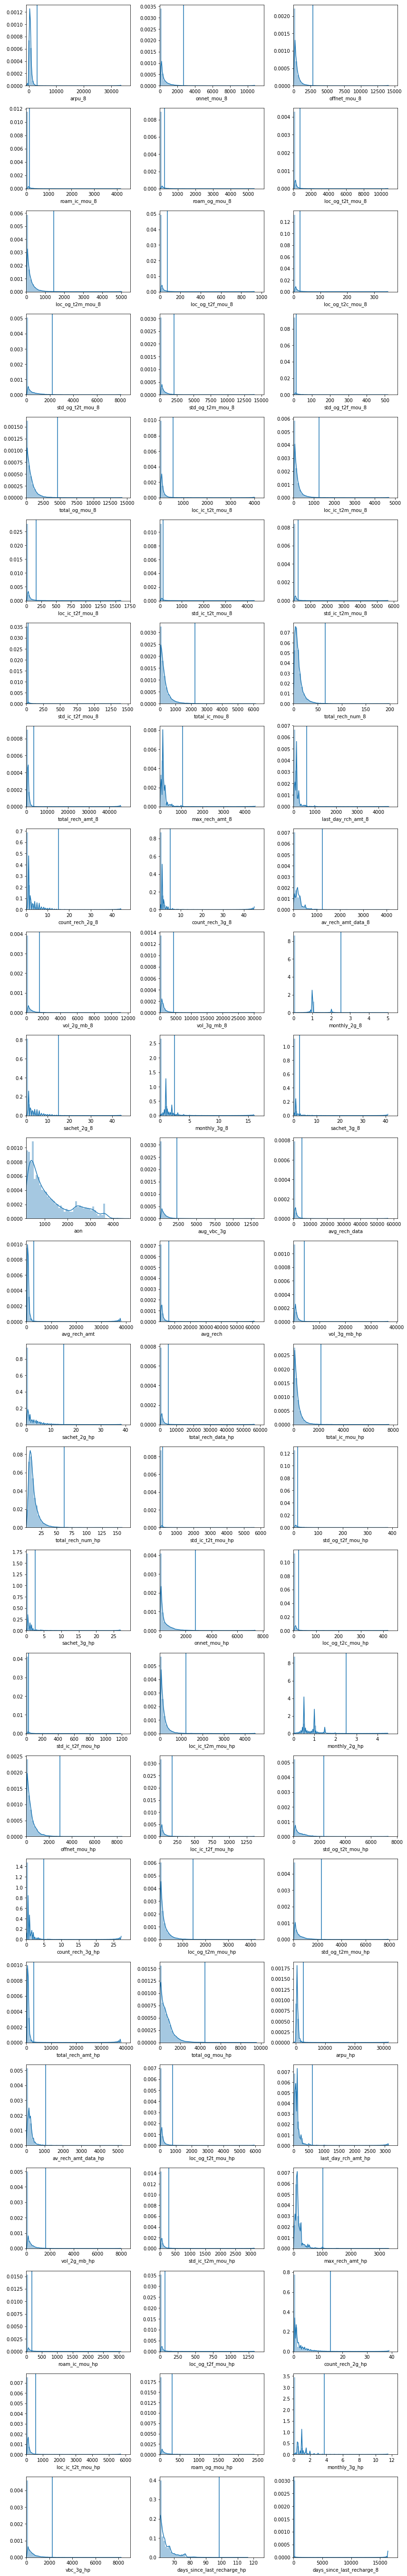

In [116]:
# Viewing the outlier in master
show_outlier_plot(df_high_end_cust,95,15)

### IQR Technique

In [117]:
# Eliminating the outlier beyond quantile 15-95
for i in list(master_1.columns):
    Q1 = master_1[i].quantile(0.15)
    Q3 = master_1[i].quantile(0.95)
    IQR = Q3 - Q1
    master_1 = master_1[(master_1[i] >= Q1 - 1.5*IQR) & (master_1[i] <= Q3 +1.5*IQR )]

In [1]:
# Checking the outlier after using quantile 15-95 in IQR technique
show_outlier_plot(master_1,95,15)

In [119]:
master_1.describe(percentiles=[0.75,0.80,.90,0.95])

arpu_8   onnet_mou_8  offnet_mou_8  roam_ic_mou_8  roam_og_mou_8  \
count  18745.000000  18745.000000  18745.000000  18745.000000   18745.000000    
mean   411.575481    190.685245    274.228867    2.690493       4.822638        
std    285.626417    329.396273    340.001022    11.143649      18.141319       
min   -50.243000     0.000000      0.000000      0.000000       0.000000        
50%    377.420000    52.130000     152.590000    0.000000       0.000000        
75%    568.608000    204.210000    381.890000    0.000000       0.000000        
80%    622.621200    276.916000    459.832000    0.000000       0.000000        
90%    777.991000    587.500000    716.470000    4.136000       7.546000        
95%    921.042000    933.616000    986.400000    16.530000      34.916000       
max    2466.531000   2442.310000   2758.930000   135.030000     148.680000      

       loc_og_t2t_mou_8  loc_og_t2m_mou_8  loc_og_t2f_mou_8  loc_og_t2c_mou_8  \
count  18745.000000      18745.000000      18745.000000      18745.000000       
mean   49.717009         128.429116        3.113041          1.015729           
std    83.421313         179.767717        7.425227          2.941572           
min    0.000000          0.000000          0.000000          0.000000           
50%    17.030000         58.240000         0.000000          0.000000           
75%    59.040000         172.640000        2.480000          0.000000           
80%    76.044000         213.816000        3.864000          0.380000           
90%    140.440000        349.516000        9.780000          3.400000           
95%    212.600000        494.774000        17.272000         7.080000           
max    718.580000        1405.860000       70.310000         22.810000          

       std_og_t2t_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  total_og_mou_8  \
count  18745.000000      18745.000000      18745.000000      18745.000000     
mean   139.059493        135.221337        0.235034          461.921882       
std    318.557089        288.923311        1.141790          509.432746       
min    0.000000          0.000000          0.000000          0.000000         
50%    0.050000          7.410000          0.000000          292.910000       
75%    82.890000         111.740000        0.000000          705.340000       
80%    155.114000        175.356000        0.000000          824.294000       
90%    511.360000        454.388000        0.000000          1191.252000      
95%    876.406000        781.698000        1.230000          1527.214000      
max    2125.940000       2011.860000       13.060000         3646.930000      

       loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  std_ic_t2t_mou_8  \
count  18745.000000      18745.000000      18745.000000      18745.000000       
mean   42.347688         122.331265        8.322589          6.082880           
std    60.864919         149.354150        17.227783         14.300888          
min    0.000000          0.000000          0.000000          0.000000           
50%    19.840000         72.260000         1.140000          0.000000           
75%    55.040000         165.890000        8.190000          4.910000           
80%    67.482000         196.510000        11.410000         7.540000           
90%    112.222000        299.622000        25.078000         18.860000          
95%    163.650000        417.896000        42.472000         33.840000          
max    515.110000        1208.760000       144.910000        129.040000         

       std_ic_t2m_mou_8  std_ic_t2f_mou_8  total_ic_mou_8  total_rech_num_8  \
count  18745.000000      18745.000000      18745.000000    18745.000000       
mean   14.636974         0.604155          202.792553      9.517205           
std    28.302730         2.040368          208.293461      8.015852           
min    0.000000          0.000000          0.000000        1.000000           
50%    2.630000          0.000000          142.980000      7.000000     

In [120]:
# Row count after outlier removal
row_count = len(master_1.index)
row_count

18745

In [121]:
# Percenatge of data retained after Outlier treatment
100*(row_count/row_count_master)

62.5813774914032

In [122]:
# Checking the outlier after using quantile 15-90 in IQR technique
for i in list(master_2.columns):
    Q1 = master_2[i].quantile(0.15)
    Q3 = master_2[i].quantile(0.90)
    IQR = Q3 - Q1
    master_2 = master_2[(master_2[i] >= Q1 - 1.5*IQR) & (master_2[i] <= Q3 +1.5*IQR )]

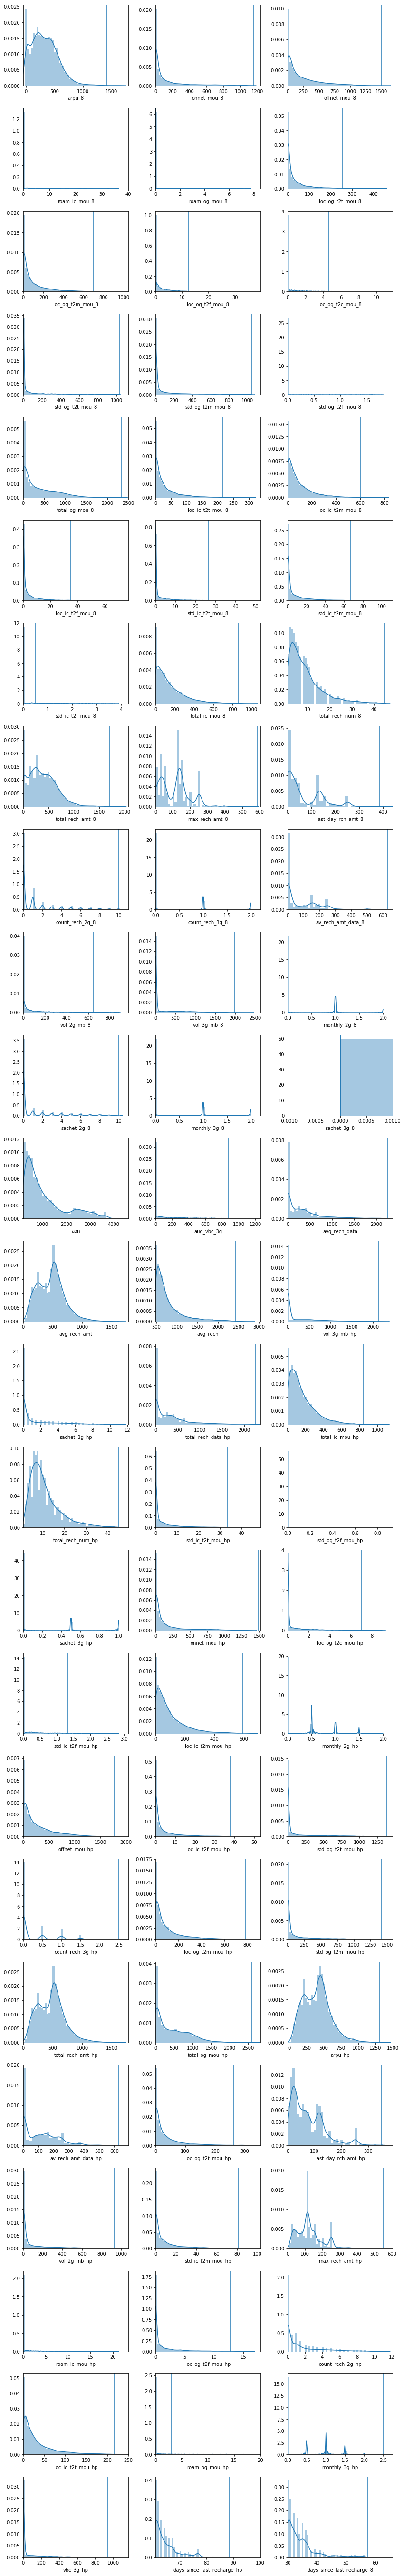

In [123]:
# Checking the outlier after using quantile 15-90 in IQR technique
show_outlier_plot(master_2,90,15)

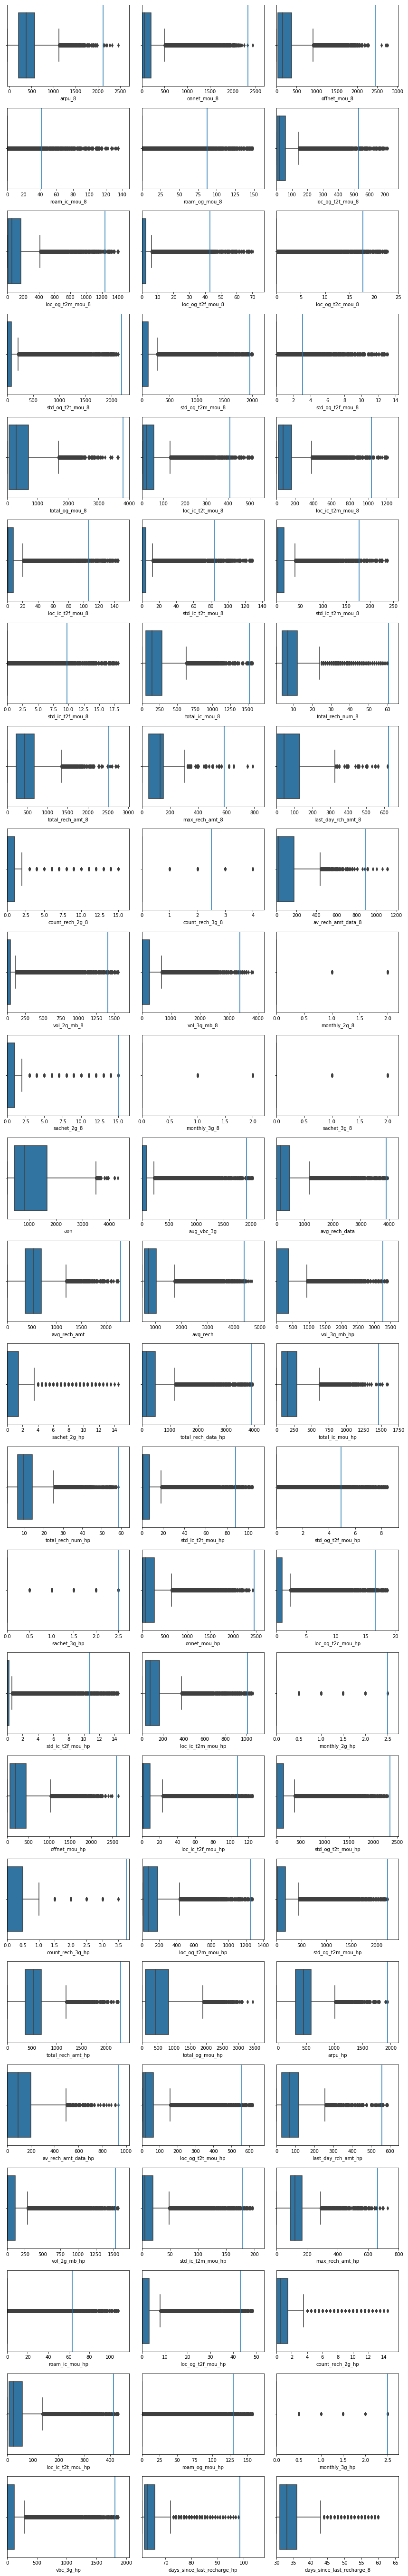

In [124]:
# Checking the outlier after using quantile 15-90 in IQR technique
show_outlier_plot_box(master_1,95,15)

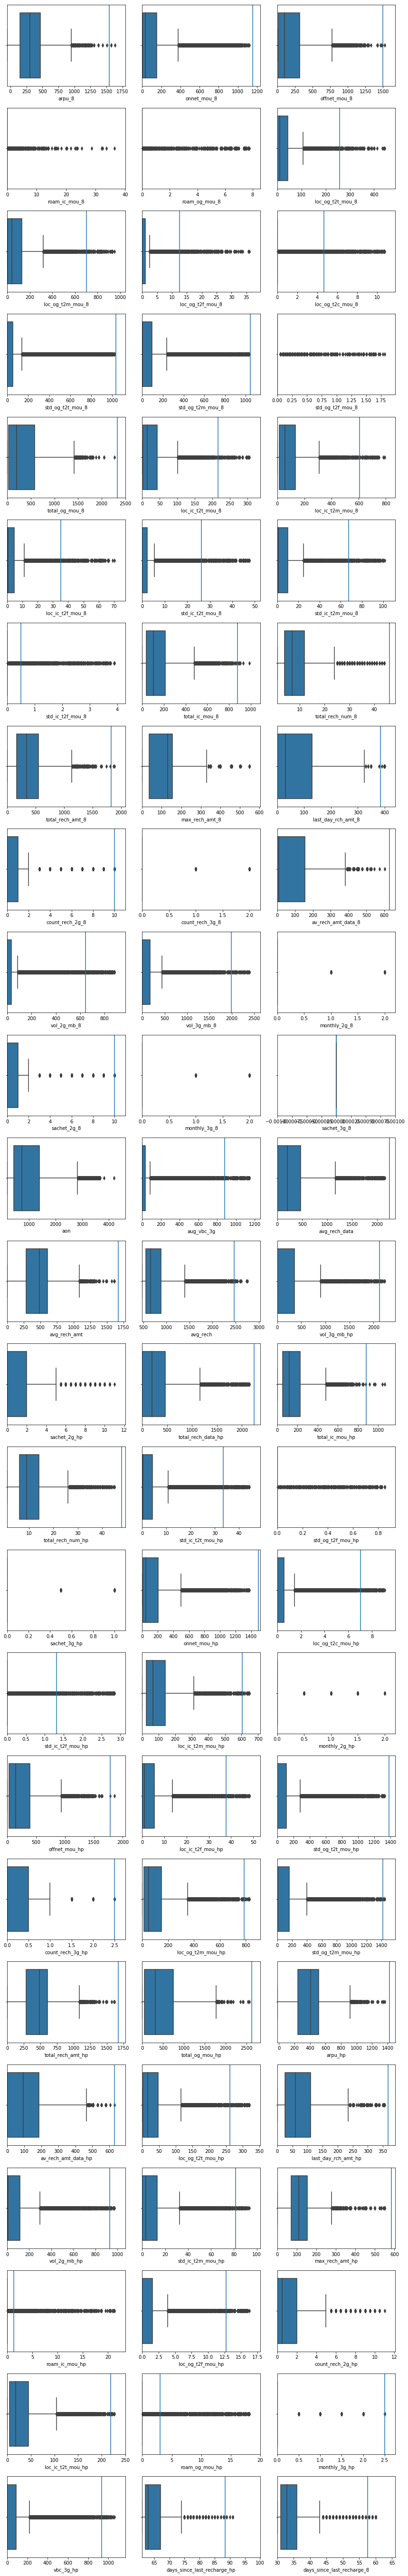

In [125]:
# Checking the outlier after using quantile 5-90 in IQR technique
show_outlier_plot_box(master_2,90,5)

In [126]:
row_count = len(master_2.index)
row_count

6979

In [127]:
100*(row_count/row_count_master)

23.29983641037626

#### IQR Observations:-
- For quantile 15-90 , IQR technique is reducing data too much
- For quantile 15-95 , post appling IQR technique, we have significant data

### Standard Deviation Outlier Treatment
```Keep only the ones that are within +3 to -3 standard deviation```

In [128]:
for i in list(master_3.columns):
    master_3 = master_3[np.abs(master_3[i]-master_3[i].mean())<=(3*master_3[i].std())] 

In [129]:
row_count = len(master_3.index)
row_count

7349

In [130]:
100*(row_count/row_count_master)

24.535104997829933

##### Too less data to consider hence discarding  Standard Deviation based Outlier Treatment

### MAD(Median Absolute Deviation) Outlier Treatment

In [131]:
# Method to identify outlier using MAD
def mad_based_outlier(points, thresh=3.5):
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

# Method to identify outlier using percentile(IQR)
def percentile_based_outlier(data, high=0.95,low=0.15):    
    Q1 = data.quantile(low)
    Q3 = data.quantile(high)
    IQR = Q3 - Q1
    return (data < Q1 - 1.5*IQR) | (data > Q3 +1.5*IQR )    

# Method to compare MAD and percentile(IQR) techniques
def compare_outlier(x):
    fig, axes = plt.subplots(nrows=2)
    for ax, func in zip(axes, [percentile_based_outlier, mad_based_outlier]):
        sns.distplot(x, ax=ax, rug=True, hist=False)
        outliers = x[func(x)]
        ax.plot(outliers, np.zeros_like(outliers), 'ro', clip_on=False)

    kwargs = dict(y=0.95, x=0.15, ha='left', va='top')
    axes[0].set_title('Percentile-based Outliers', **kwargs)
    axes[1].set_title('MAD-based Outliers', **kwargs)
    fig.suptitle('Comparing Outlier Tests with n={}'.format(len(x)), size=10)

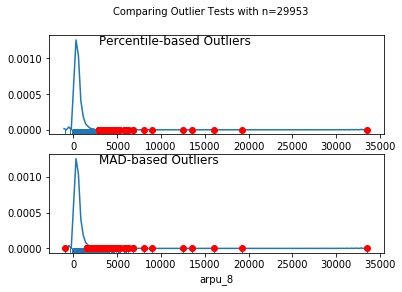

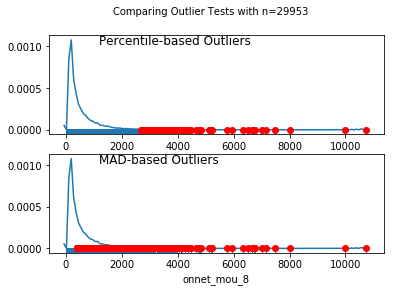

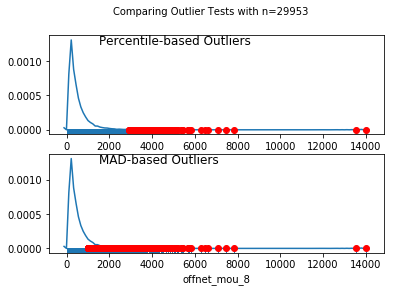

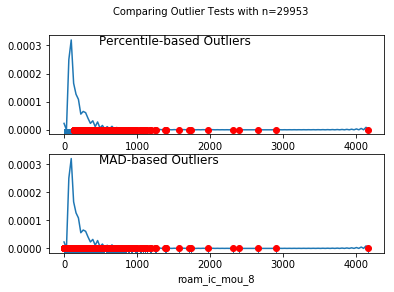

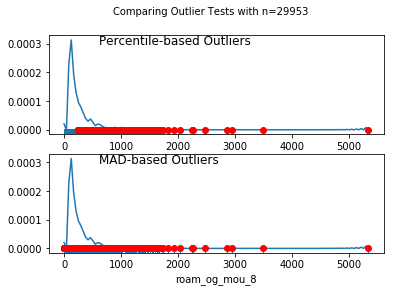

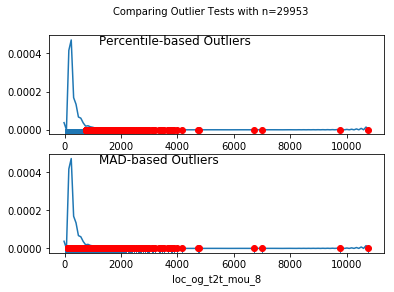

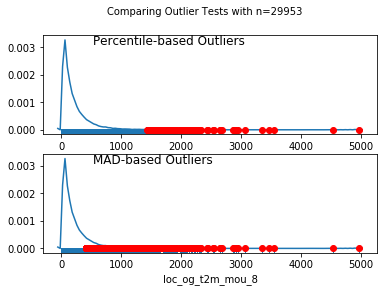

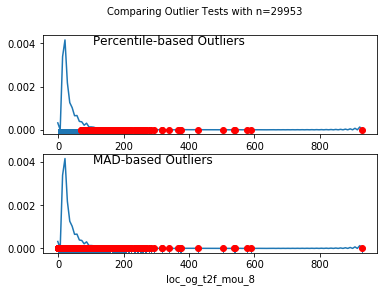

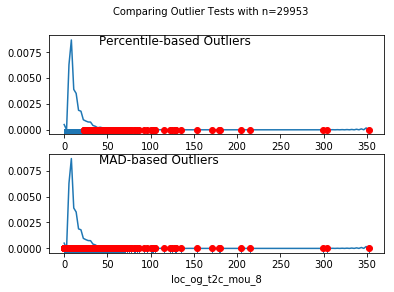

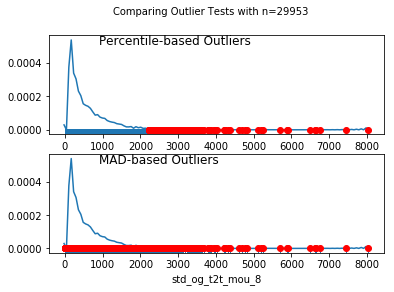

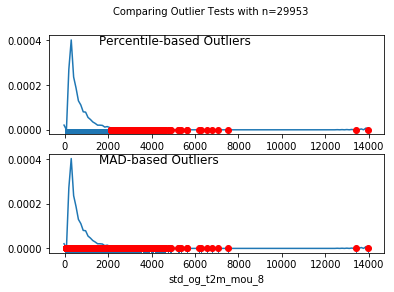

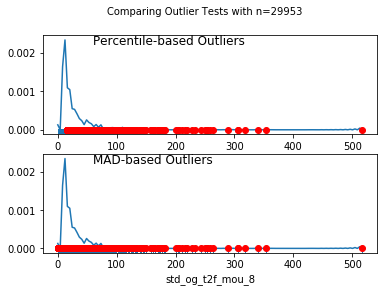

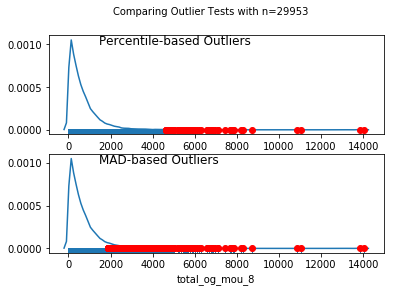

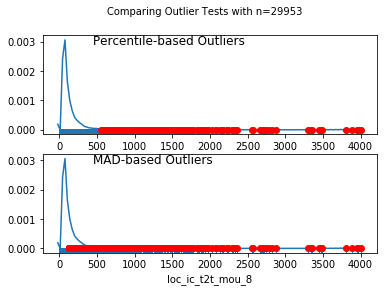

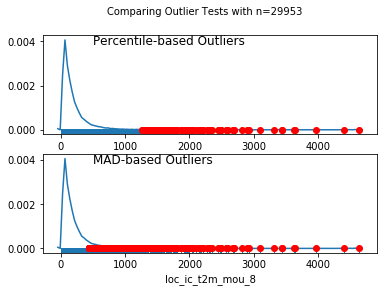

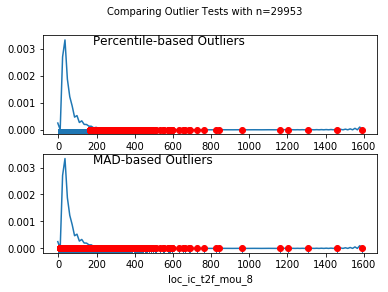

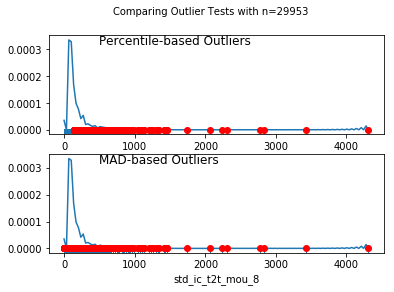

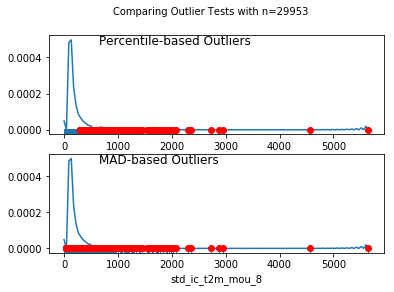

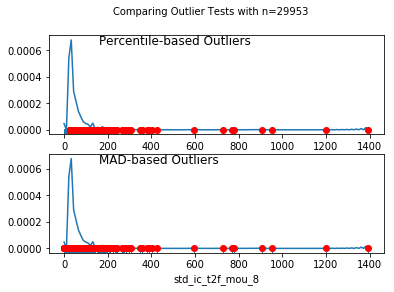

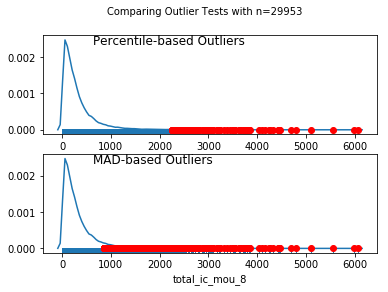

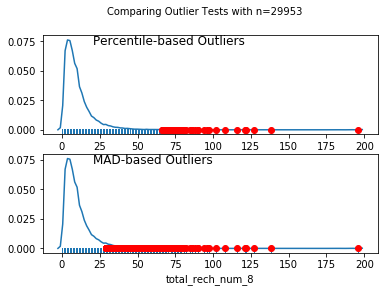

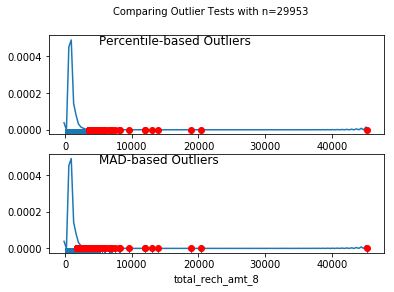

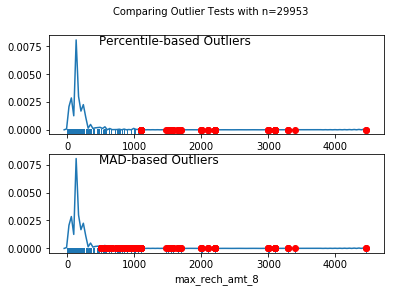

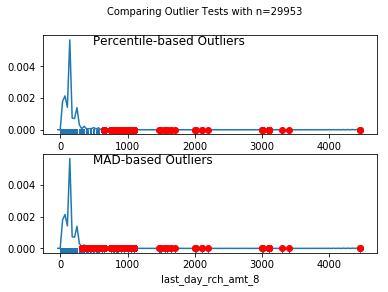

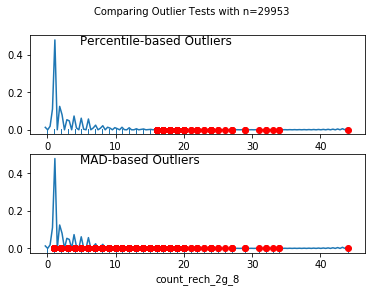

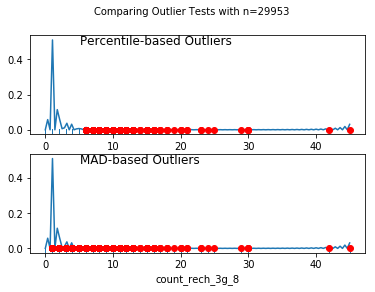

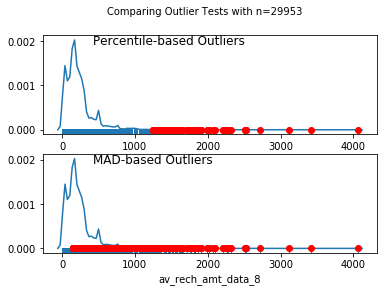

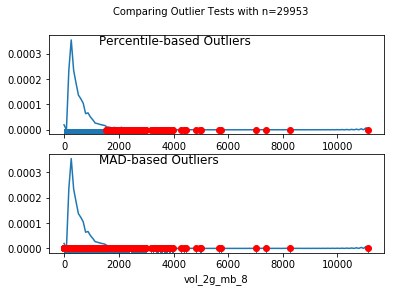

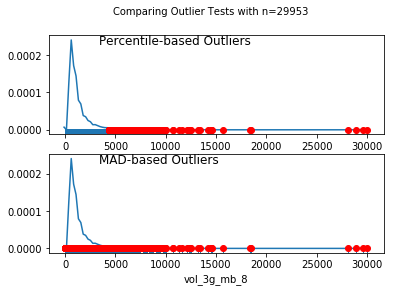

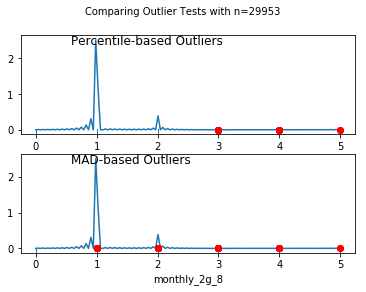

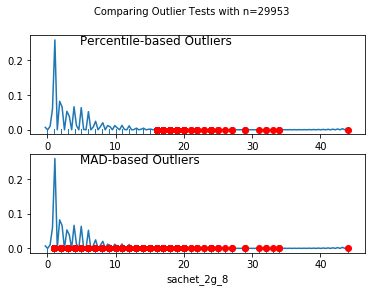

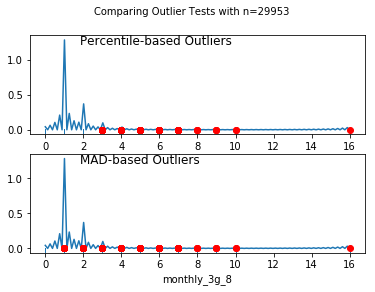

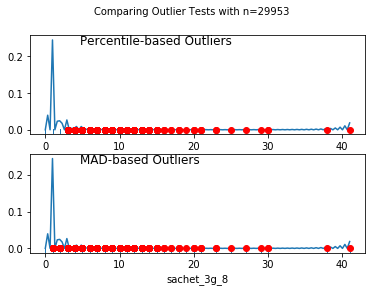

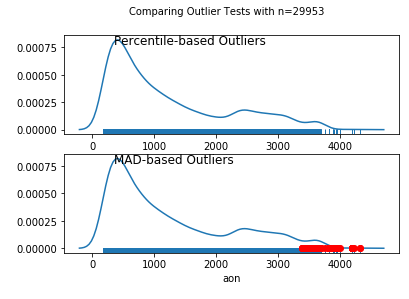

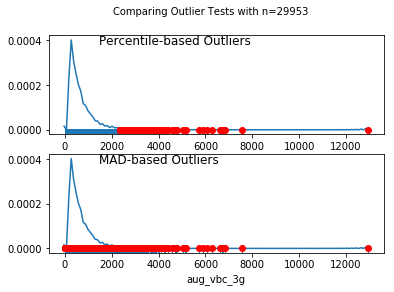

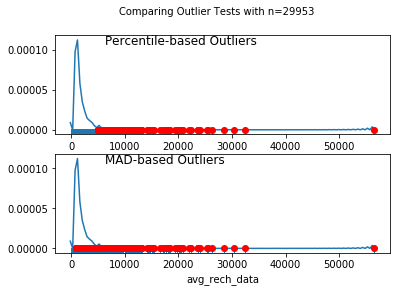

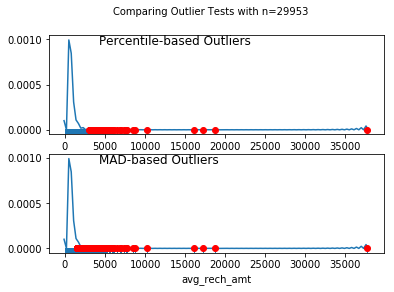

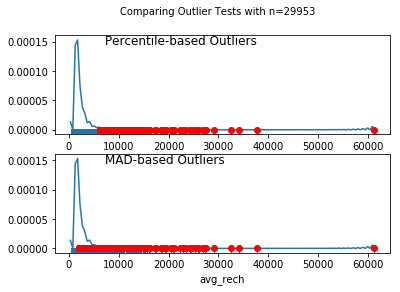

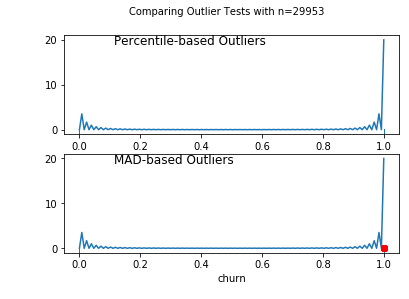

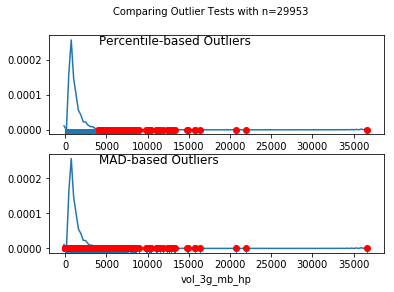

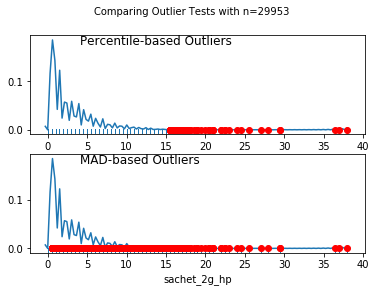

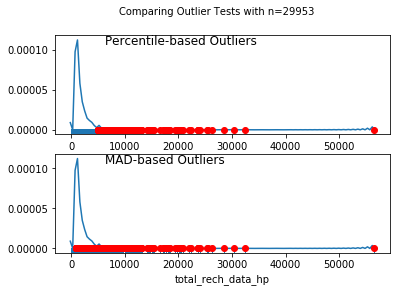

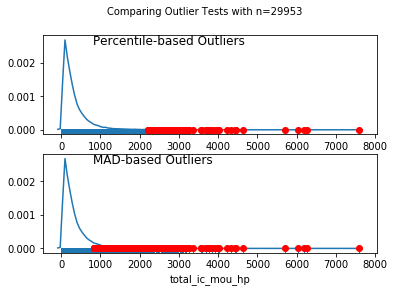

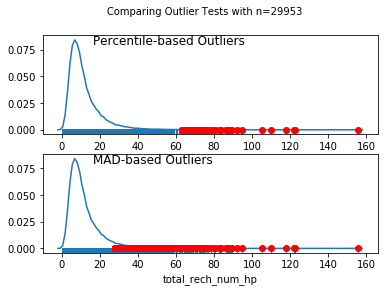

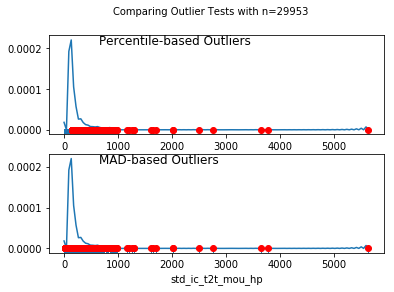

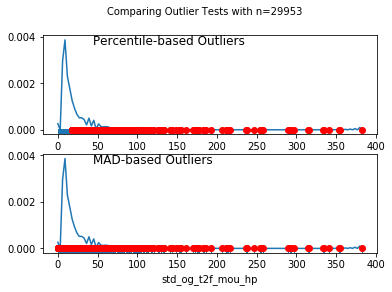

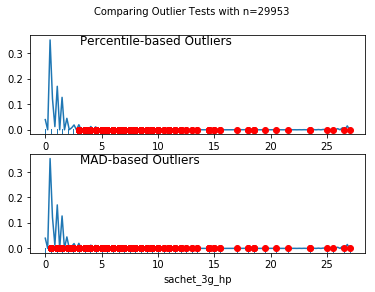

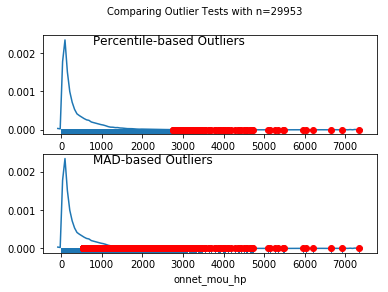

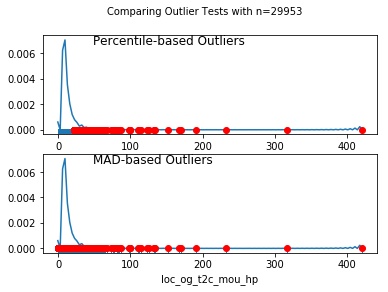

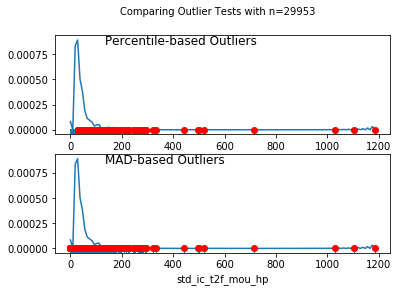

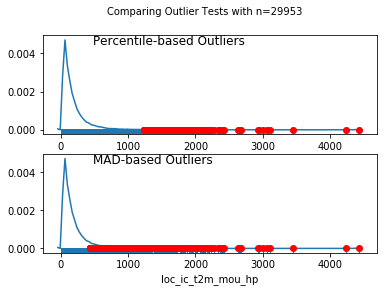

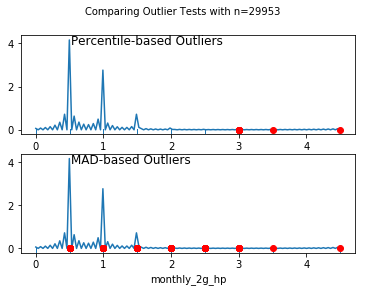

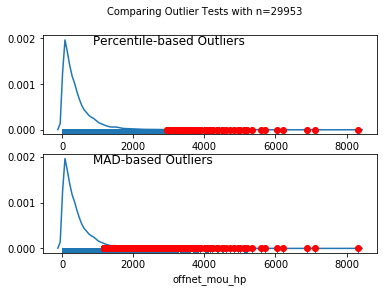

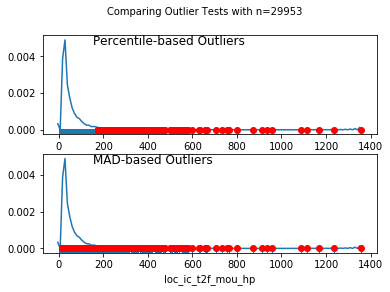

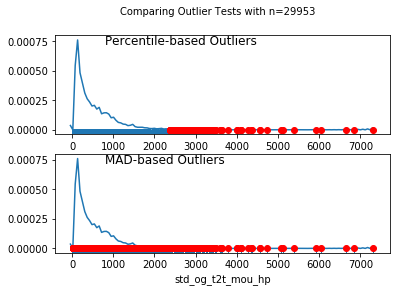

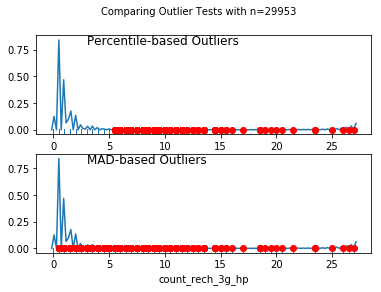

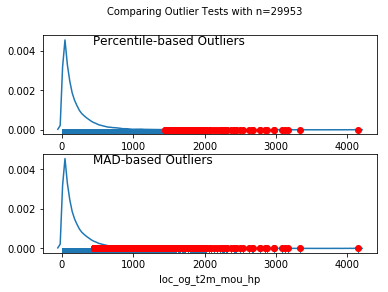

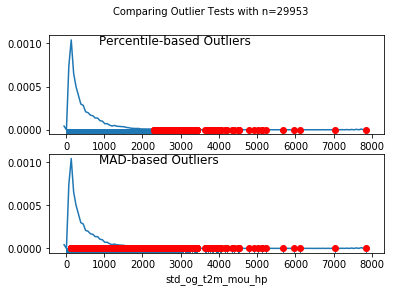

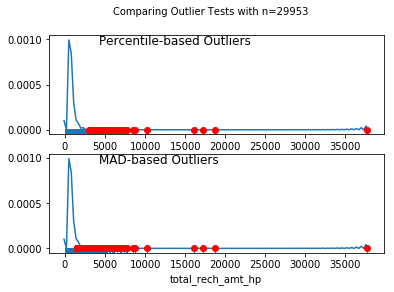

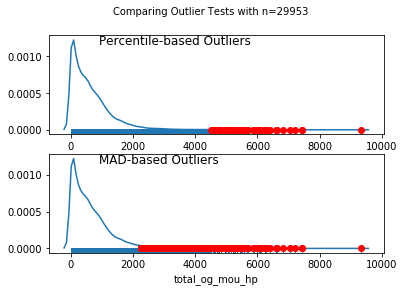

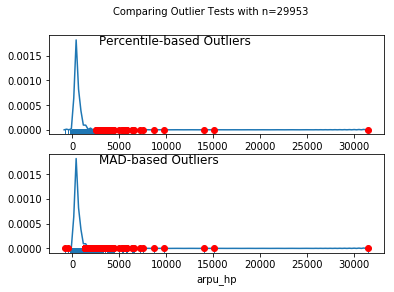

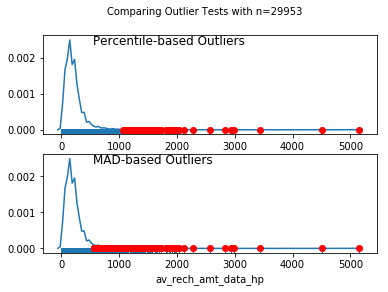

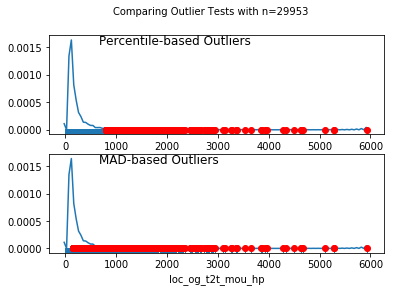

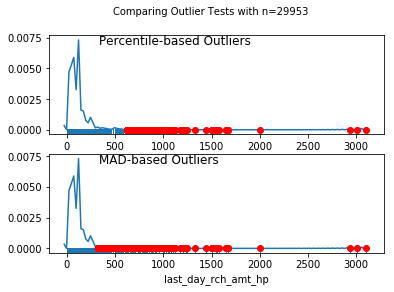

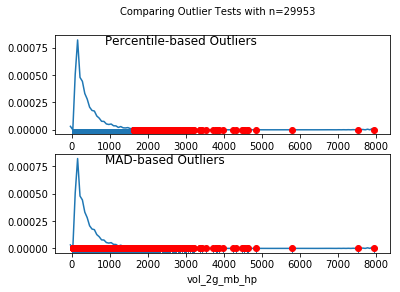

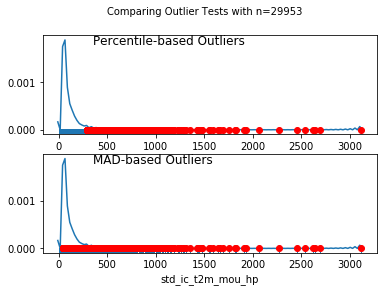

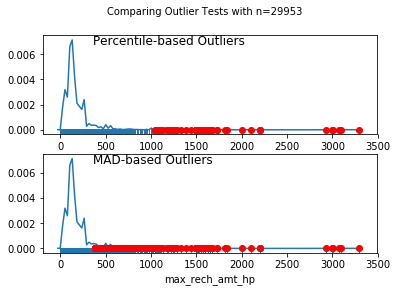

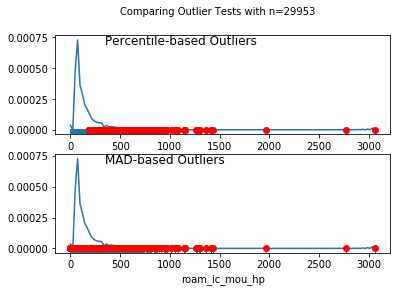

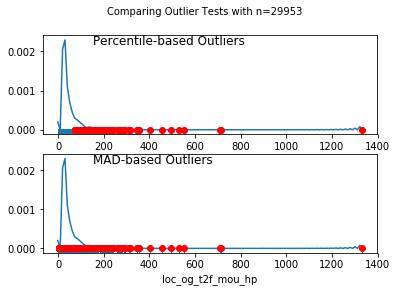

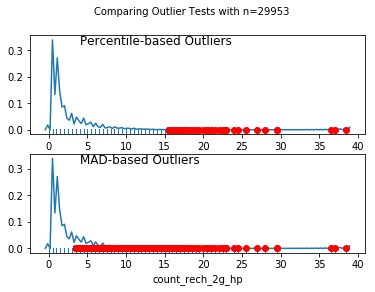

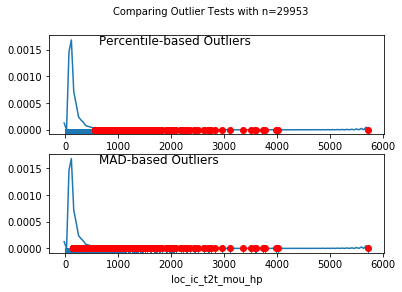

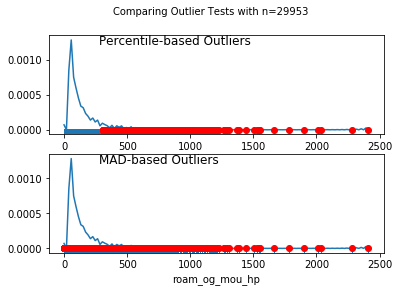

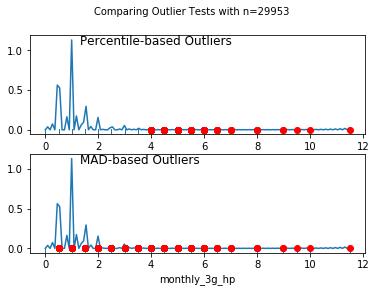

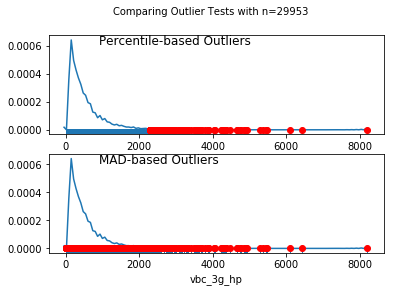

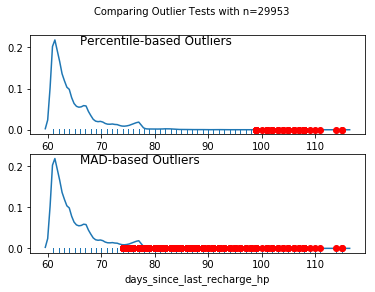

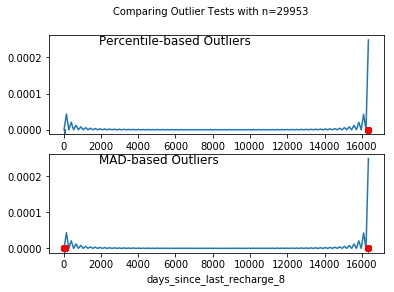

In [132]:
### Comparing MAD and Percentile based graph
for i in list(master_4.columns):
    compare_outlier(master_4[i])
    

In [133]:
# Columns where MAD is performing better
cols_mad=['offnet_mou_8','loc_og_t2m_mou_8','total_og_mou_8','total_ic_mou_8','total_rech_num_8','max_rech_amt_8',\
          'last_day_rch_amt_8','aon','arpu_hp','offnet_mou_hp','loc_og_t2m_mou_hp','max_rech_amt_hp',\
         'total_rech_num_hp','av_rech_amt_data_hp','last_day_rch_amt_hp','total_og_mou_hp',\
         'loc_ic_t2m_mou_hp','total_ic_mou_hp','count_rech_2g_hp','days_since_last_recharge_hp']

In [134]:
row_mad_master=len(master_4[cols_mad].index)
row_mad_master

29953

In [135]:
# Applying MAD
for i in list(cols_mad):      
    master_4=master_4[~mad_based_outlier(master_4[i])]

In [136]:
row_count = len(master_4.index)
row_count

11275

In [137]:
100*(row_count/row_mad_master)

37.64230627983841

#### MAD Outlier observations:-
- Too less data to consider hence discarding  MAD based Outlier Treatment

````Hence using IQR with .95 and .15 ````

### Applying IQR with 0.95 and 0.15 

In [138]:
## Applying the IQR to the actual dataframe
for i in list(df_high_end_cust.columns):
    Q1 = df_high_end_cust[i].quantile(0.05)
    Q3 = df_high_end_cust[i].quantile(0.95)
    IQR = Q3 - Q1
    df_high_end_cust = df_high_end_cust[(df_high_end_cust[i] >= Q1 - 1.5*IQR) & (df_high_end_cust[i] <= Q3 +1.5*IQR )]

### Removing columns with very minimal impact on the data

In [139]:
# Columns with quantile 85 have values around 0
col_to_drop_85= list(df_high_end_cust.columns[df_high_end_cust.quantile(0.85)<1])
print(len(col_to_drop_85))
col_to_drop_85

12


['roam_ic_mou_8',
 'roam_og_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'monthly_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'churn',
 'std_og_t2f_mou_hp',
 'sachet_3g_hp',
 'monthly_2g_hp',
 'monthly_3g_hp']

In [140]:
#Columns with quantile 90 have values around 0
col_to_drop_90= list(df_high_end_cust.columns[df_high_end_cust.quantile(0.90)<1])
print(len(col_to_drop_90))
col_to_drop_90

5


['std_og_t2f_mou_8',
 'sachet_3g_8',
 'churn',
 'std_og_t2f_mou_hp',
 'sachet_3g_hp']

In [141]:
# Columns with quantile 85 have values around 0
col_to_drop_75= list(df_high_end_cust.columns[df_high_end_cust.quantile(0.75)<1])
print(len(col_to_drop_75))
col_to_drop_75

19


['roam_ic_mou_8',
 'roam_og_mou_8',
 'loc_og_t2c_mou_8',
 'std_og_t2f_mou_8',
 'std_ic_t2f_mou_8',
 'count_rech_3g_8',
 'monthly_2g_8',
 'monthly_3g_8',
 'sachet_3g_8',
 'churn',
 'std_og_t2f_mou_hp',
 'sachet_3g_hp',
 'loc_og_t2c_mou_hp',
 'std_ic_t2f_mou_hp',
 'monthly_2g_hp',
 'count_rech_3g_hp',
 'roam_ic_mou_hp',
 'roam_og_mou_hp',
 'monthly_3g_hp']

In [142]:
col_to_drop_75.remove('churn')

In [143]:
# Droppinig the columns which are not required
df_high_end_cust=df_high_end_cust.drop(col_to_drop_75,axis=1)

In [144]:
# No. of columns left
len(df_high_end_cust.columns)

58

In [145]:
df_high_end_cust.describe(percentiles=[0.75,0.80,.90,0.95])

arpu_8   onnet_mou_8  offnet_mou_8  loc_og_t2t_mou_8  \
count  18842.000000  18842.000000  18842.000000  18842.000000       
mean   413.012869    190.758239    275.075179    49.891469          
std    287.541418    329.487128    341.257085    83.666855          
min   -50.243000     0.000000      0.000000      0.000000           
50%    378.474500    52.195000     153.040000    17.080000          
75%    570.083750    204.420000    383.020000    59.225000          
80%    624.318400    277.256000    461.050000    76.280000          
90%    780.072000    587.860000    718.467000    140.889000         
95%    925.515300    933.686500    990.101500    213.473000         
max    2466.531000   2442.310000   2758.930000   718.580000         

       loc_og_t2m_mou_8  loc_og_t2f_mou_8  std_og_t2t_mou_8  std_og_t2m_mou_8  \
count  18842.000000      18842.000000      18842.000000      18842.000000       
mean   129.054501        3.137355          138.948410        135.384475         
std    180.833663        7.473219          318.596173        289.605056         
min    0.000000          0.000000          0.000000          0.000000           
50%    58.450000         0.000000          0.050000          7.410000           
75%    173.332500        2.490000          82.775000         111.652500         
80%    214.606000        3.890000          154.576000        175.290000         
90%    351.713000        9.928000          510.918000        454.427000         
95%    497.754000        17.330000         876.286000        782.001500         
max    1405.860000       70.310000         2126.960000       2015.260000        

       total_og_mou_8  loc_ic_t2t_mou_8  loc_ic_t2m_mou_8  loc_ic_t2f_mou_8  \
count  18842.000000    18842.000000      18842.000000      18842.000000       
mean   462.818460      42.479203         122.832549        8.344088           
std    510.328319      61.071893         150.438871        17.243960          
min    0.000000        0.000000          0.000000          0.000000           
50%    293.965000      19.910000         72.335000         1.150000           
75%    706.890000      55.312500         166.302500        8.237500           
80%    826.004000      67.630000         197.104000        11.440000          
90%    1193.837000     112.535000        300.350000        25.208000          
95%    1528.648000     164.175500        419.389500        42.589500          
max    3646.930000     515.110000        1222.840000       144.910000         

       std_ic_t2t_mou_8  std_ic_t2m_mou_8  total_ic_mou_8  total_rech_num_8  \
count  18842.000000      18842.000000      18842.000000    18842.000000       
mean   6.082216          14.675649         203.572445      9.534550           
std    14.291611         28.374931         209.594808      8.075285           
min    0.000000          0.000000          0.000000        1.000000           
50%    0.000000          2.630000          143.520000      7.000000           
75%    4.910000          15.940000         283.785000      12.000000          
80%    7.540000          21.880000         328.088000      14.000000          
90%    18.860000         43.540000         470.676000      20.000000          
95%    33.838500         70.837500         624.230000      26.000000          
max    129.040000        238.890000        1649.860000     62.000000          

       total_rech_amt_8  max_rech_amt_8  last_day_rch_amt_8  count_rech_2g_8  \
count  18842.000000      18842.000000    18842.000000        18842.000000      
mean   475.722163        132.888918      75.923681           1.236546          
std    345.653412        99.995533       88.001464           2.355496          
min    0.000000          0.000000        0.000000            0.000000          
50%    430.000000        130.000000      41.000000           0.000000          
75%    669.000000        154.000000      130.000000          1.000000          
80%    736.000000        198.000000      130.000000          

In [146]:
row_count = len(df_high_end_cust.index)
row_count

18842

In [147]:
# Data Retained
100*(row_count/row_count_master)

62.90521817514105

In [148]:
len(df_high_end_cust.columns)

58

In [149]:
# Finding the highly correlated columns
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
# Get top abs correalations for the dataframe
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]


In [150]:
df_corr=pd.DataFrame(get_top_abs_correlations(df_high_end_cust,60))

In [151]:
df_corr.shape

(60, 1)

In [152]:
df_corr

0
avg_rech_data      total_rech_data_hp   1.000000
avg_rech_amt       total_rech_amt_hp    1.000000
count_rech_2g_8    sachet_2g_8          0.986495
sachet_2g_hp       count_rech_2g_hp     0.986084
avg_rech_amt       arpu_hp              0.977573
total_rech_amt_hp  arpu_hp              0.977573
onnet_mou_hp       std_og_t2t_mou_hp    0.968583
onnet_mou_8        std_og_t2t_mou_8     0.966817
arpu_8             total_rech_amt_8     0.958981
loc_ic_t2m_mou_8   total_ic_mou_8       0.907937
total_ic_mou_hp    loc_ic_t2m_mou_hp    0.905119
avg_rech_data      avg_rech             0.874966
avg_rech           total_rech_data_hp   0.874966
offnet_mou_hp      std_og_t2m_mou_hp    0.860275
offnet_mou_8       std_og_t2m_mou_8     0.841291
total_ic_mou_8     total_ic_mou_hp      0.818166
loc_ic_t2m_mou_8   loc_ic_t2m_mou_hp    0.812003
loc_og_t2m_mou_8   loc_og_t2m_mou_hp    0.810407
loc_og_t2t_mou_8   loc_og_t2t_mou_hp    0.786397
avg_rech_data      count_rech_2g_hp     0.783692
total_rech_data_hp count_rech_2g_hp     0.783692
std_og_t2t_mou_8   std_og_t2t_mou_hp    0.777944
loc_ic_t2t_mou_8   loc_ic_t2t_mou_hp    0.770886
offnet_mou_8       total_og_mou_8       0.769047
onnet_mou_8        onnet_mou_hp         0.768284
avg_rech_data      sachet_2g_hp         0.765362
sachet_2g_hp       total_rech_data_hp   0.765362
std_og_t2t_mou_8   onnet_mou_hp         0.754386
onnet_mou_8        total_og_mou_8       0.749341
loc_ic_t2m_mou_8   total_ic_mou_hp      0.748603
total_ic_mou_8     loc_ic_t2m_mou_hp    0.746953
onnet_mou_8        std_og_t2t_mou_hp    0.740900
offnet_mou_hp      total_og_mou_hp      0.739685
std_og_t2m_mou_8   std_og_t2m_mou_hp    0.739479
vol_3g_mb_hp       av_rech_amt_data_hp  0.737307
arpu_8             total_og_mou_8       0.736777
total_og_mou_8     total_rech_amt_8     0.722954
total_og_mou_hp    arpu_hp              0.721880
offnet_mou_8       offnet_mou_hp        0.721782
total_og_mou_8     total_og_mou_hp      0.721229
sachet_2g_8        sachet_2g_hp         0.720375
onnet_mou_hp       total_og_mou_hp      0.720262
avg_rech_amt       total_og_mou_hp      0.718547
total_rech_amt_hp  total_og_mou_hp      0.718547
loc_ic_t2f_mou_8   loc_ic_t2f_mou_hp    0.717508
total_rech_num_8   total_rech_num_hp    0.716756
count_rech_2g_8    count_rech_2g_hp     0.715533
sachet_2g_8        count_rech_2g_hp     0.709860
count_rech_2g_8    sachet_2g_hp         0.709496
av_rech_amt_data_8 vol_3g_mb_8          0.707400
vol_3g_mb_hp       vbc_3g_hp            0.704668
loc_og_t2f_mou_8   loc_og_t2f_mou_hp    0.695298
aug_vbc_3g         vbc_3g_hp            0.693806
std_og_t2t_mou_8   total_og_mou_8       0.688505
vol_3g_mb_8        vol_3g_mb_hp         0.679762
std_og_t2t_mou_hp  total_og_mou_hp      0.672502
vol_3g_mb_8        aug_vbc_3g           0.669665
std_og_t2m_mou_8   total_og_mou_8       0.661408
total_rech_data_hp av_rech_amt_data_hp  0.660089
avg_rech_data      av_rech_amt_data_hp  0.660089

In [153]:
# Columns with high correlation
high_corr_cols=['total_rech_data_hp','total_rech_amt_hp','sachet_2g_8','sachet_2g_hp','arpu_hp','onnet_mou_hp','std_og_t2t_mou_8','total_rech_amt_8','total_ic_mou_8','total_ic_mou_hp','avg_rech','std_og_t2m_mou_hp','std_og_t2m_mou_8','loc_ic_t2m_mou_hp','loc_og_t2m_mou_hp','count_rech_2g_hp','loc_og_t2t_mou_hp','std_og_t2t_mou_hp','loc_ic_t2t_mou_hp','total_og_mou_8','offnet_mou_hp','total_og_mou_hp','vol_3g_mb_hp','loc_ic_t2f_mou_hp','total_rech_num_hp']

In [154]:
high_corr_cols

['total_rech_data_hp',
 'total_rech_amt_hp',
 'sachet_2g_8',
 'sachet_2g_hp',
 'arpu_hp',
 'onnet_mou_hp',
 'std_og_t2t_mou_8',
 'total_rech_amt_8',
 'total_ic_mou_8',
 'total_ic_mou_hp',
 'avg_rech',
 'std_og_t2m_mou_hp',
 'std_og_t2m_mou_8',
 'loc_ic_t2m_mou_hp',
 'loc_og_t2m_mou_hp',
 'count_rech_2g_hp',
 'loc_og_t2t_mou_hp',
 'std_og_t2t_mou_hp',
 'loc_ic_t2t_mou_hp',
 'total_og_mou_8',
 'offnet_mou_hp',
 'total_og_mou_hp',
 'vol_3g_mb_hp',
 'loc_ic_t2f_mou_hp',
 'total_rech_num_hp']

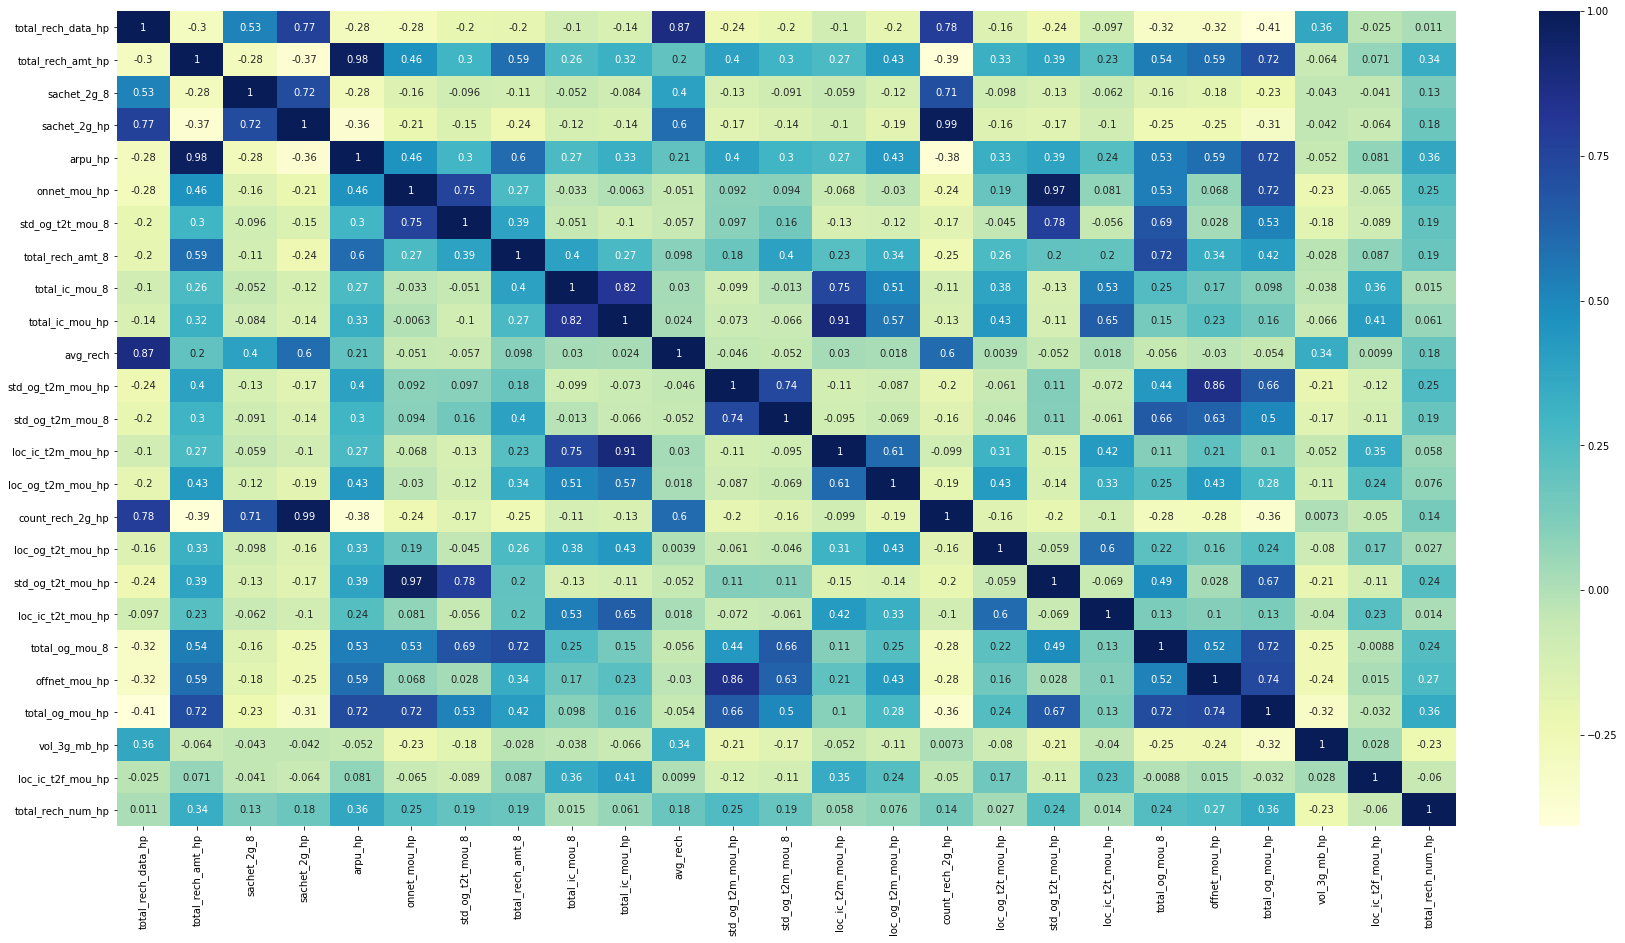

In [155]:
# Viewing the correlation
plt.figure(figsize=(30,15))
sns.heatmap(df_high_end_cust[high_corr_cols].corr(), cmap="YlGnBu", annot = True)
plt.show()

In [156]:
# Dropping columns which have high correlation with other columns
cols_to_drop=['avg_rech_data','avg_rech_amt','count_rech_2g_8','total_rech_amt_hp','std_og_t2t_mou_8','total_rech_amt_8','avg_rech','std_og_t2m_mou_hp','std_og_t2m_mou_8','total_ic_mou_8','count_rech_2g_hp','loc_og_t2t_mou_8','loc_ic_t2t_mou_8','sachet_2g_hp','offnet_mou_8','loc_ic_t2m_mou_8','onnet_mou_8','loc_ic_t2m_mou_hp','total_og_mou_8','std_og_t2t_mou_hp','loc_og_t2m_mou_8','total_og_mou_hp','av_rech_amt_data_hp','loc_ic_t2f_mou_8','total_rech_num_8','av_rech_amt_data_8','vol_3g_mb_hp']

In [157]:
df_high_end_cust=df_high_end_cust.drop(cols_to_drop,axis=1)

In [158]:
# Columns left 
len(df_high_end_cust.columns)

31

In [159]:
get_top_abs_correlations(df_high_end_cust,40)

loc_og_t2f_mou_8     loc_og_t2f_mou_hp              0.695298
aug_vbc_3g           vbc_3g_hp                      0.693806
vol_3g_mb_8          aug_vbc_3g                     0.669665
total_ic_mou_hp      loc_ic_t2t_mou_hp              0.648388
std_ic_t2m_mou_8     std_ic_t2m_mou_hp              0.641891
last_day_rch_amt_hp  max_rech_amt_hp                0.625943
max_rech_amt_8       max_rech_amt_hp                0.623379
arpu_8               arpu_hp                        0.615555
vol_2g_mb_8          vol_2g_mb_hp                   0.607731
loc_og_t2t_mou_hp    loc_ic_t2t_mou_hp              0.602438
offnet_mou_hp        arpu_hp                        0.592814
max_rech_amt_8       last_day_rch_amt_8             0.592494
std_ic_t2t_mou_8     std_ic_t2t_mou_hp              0.591704
total_ic_mou_hp      loc_og_t2m_mou_hp              0.570953
sachet_2g_8          total_rech_data_hp             0.525159
vol_3g_mb_8          vbc_3g_hp                      0.498346
onnet_mou_hp         arp

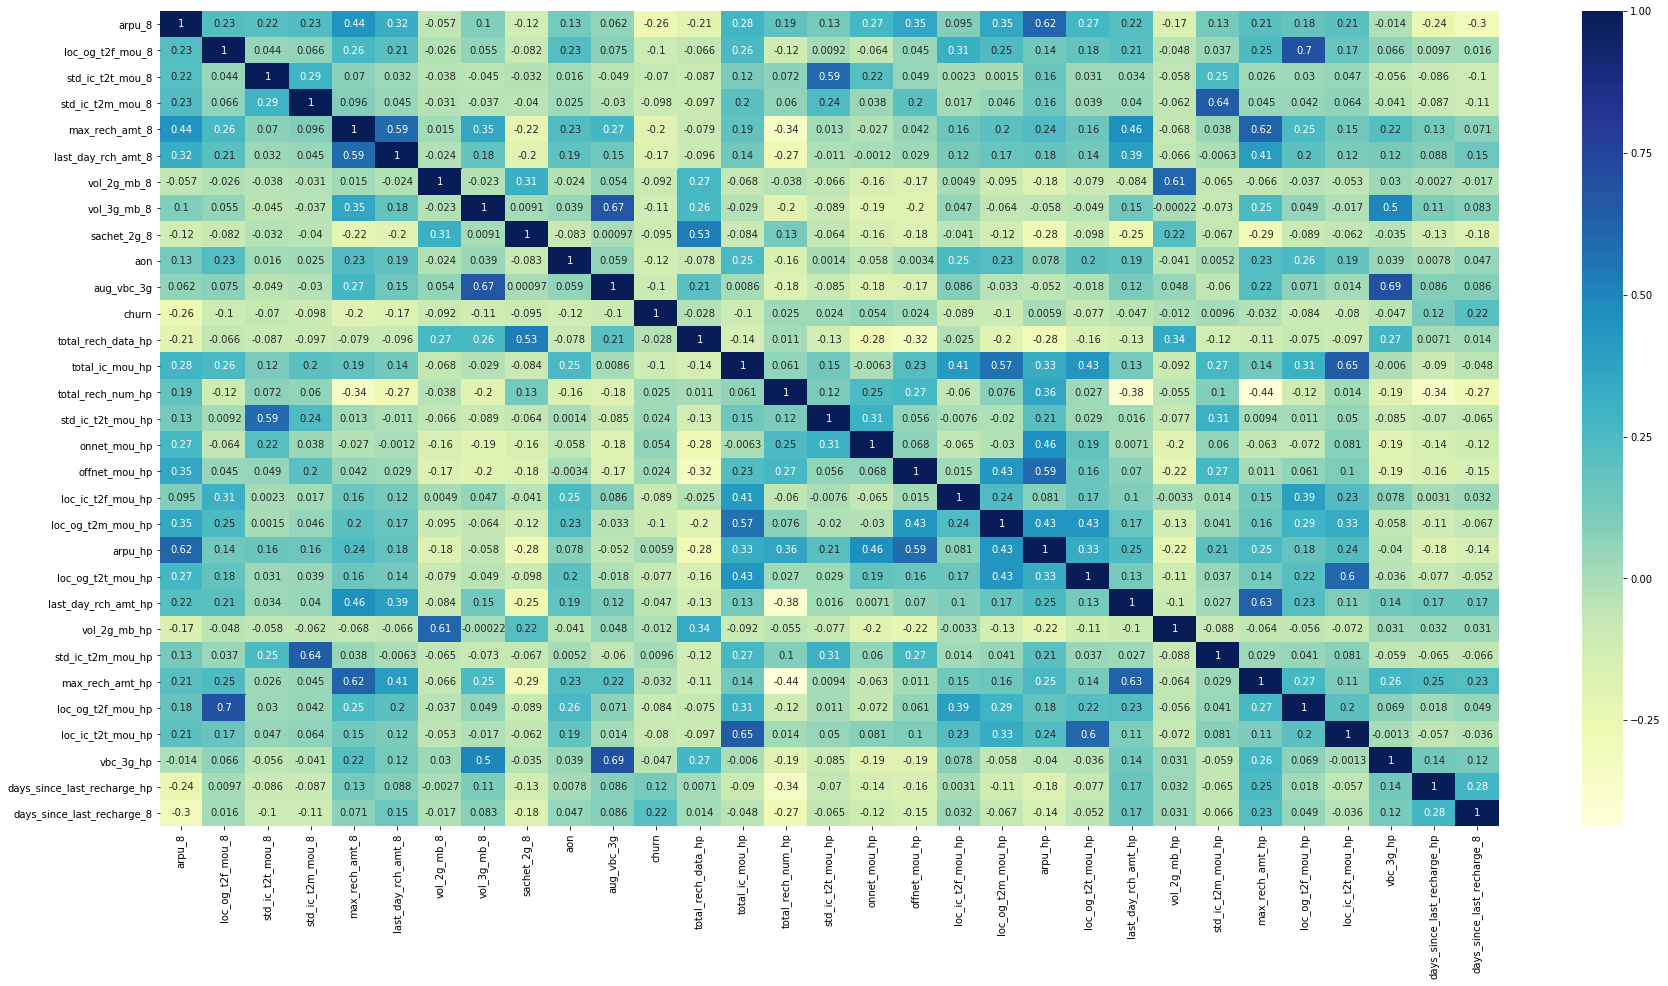

In [160]:
#Finding the correlation
plt.figure(figsize=(30,15))
sns.heatmap(df_high_end_cust.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [ ]:
# Pairplot for each numerical value
nr_rows = 9
nr_cols = 4
numerical_col=df_high_end_cust.columns
plt.figure(figsize=(nr_cols*6,nr_rows*3))

for col in numerical_col:
    for index in range(0,len(numerical_col),4):    
        sns.pairplot(df_high_end_cust, y_vars=col,x_vars=numerical_col[index:index+4])   
    
plt.show()


### Fixing the Data Imbalance Issue

In [162]:
# Graph to view the data class
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [163]:
# Defining the X and Y
X=df_high_end_cust.drop(['churn'],axis=1)
y=df_high_end_cust['churn']

In [164]:
df_high_end_cust.dtypes

arpu_8                         float64
loc_og_t2f_mou_8               float64
std_ic_t2t_mou_8               float64
std_ic_t2m_mou_8               float64
max_rech_amt_8                 int64  
last_day_rch_amt_8             int64  
vol_2g_mb_8                    float64
vol_3g_mb_8                    float64
sachet_2g_8                    int64  
aon                            int64  
aug_vbc_3g                     float64
churn                          int64  
total_rech_data_hp             float64
total_ic_mou_hp                float64
total_rech_num_hp              float64
std_ic_t2t_mou_hp              float64
onnet_mou_hp                   float64
offnet_mou_hp                  float64
loc_ic_t2f_mou_hp              float64
loc_og_t2m_mou_hp              float64
arpu_hp                        float64
loc_og_t2t_mou_hp              float64
last_day_rch_amt_hp            float64
vol_2g_mb_hp                   float64
std_ic_t2m_mou_hp              float64
max_rech_amt_hp          

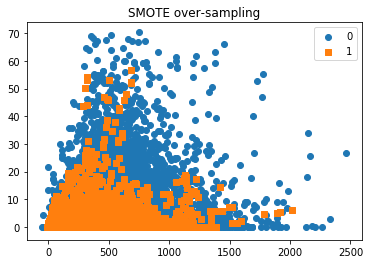

In [165]:
# Using SMOTE to treat the data imbalance
from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

In [166]:
# Data is balanced now 
churn = (sum(y_sm)/len(y_sm))*100
churn

50.0

In [167]:
len(X.columns)

30

In [168]:
# Retaining the columns in the dataframe
X_sm=pd.DataFrame(X_sm,columns=X.columns)

In [169]:
from sklearn.model_selection import train_test_split

In [170]:
# Test ,Train split
X_train_1, X_test_1, y_train, y_test = train_test_split(X_sm,y_sm, train_size=0.7,test_size=0.3,random_state=100)

In [171]:
X_train_1.columns

Index(['arpu_8', 'loc_og_t2f_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8',
       'max_rech_amt_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'vol_3g_mb_8',
       'sachet_2g_8', 'aon', 'aug_vbc_3g', 'total_rech_data_hp',
       'total_ic_mou_hp', 'total_rech_num_hp', 'std_ic_t2t_mou_hp',
       'onnet_mou_hp', 'offnet_mou_hp', 'loc_ic_t2f_mou_hp',
       'loc_og_t2m_mou_hp', 'arpu_hp', 'loc_og_t2t_mou_hp',
       'last_day_rch_amt_hp', 'vol_2g_mb_hp', 'std_ic_t2m_mou_hp',
       'max_rech_amt_hp', 'loc_og_t2f_mou_hp', 'loc_ic_t2t_mou_hp',
       'vbc_3g_hp', 'days_since_last_recharge_hp',
       'days_since_last_recharge_8'],
      dtype='object')

In [172]:
#Standardising the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train_1)

In [173]:
# Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [174]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [175]:
# View the PCA components
pca.components_

array([[ 3.04309525e-01,  2.28428633e-01,  1.25073092e-01,
         1.51941628e-01,  2.80336056e-01,  2.34194468e-01,
        -3.89949021e-02,  7.69729221e-02, -8.98864327e-02,
         1.82324962e-01,  8.83156607e-02, -1.43157524e-01,
         2.95753455e-01, -1.20432549e-02,  8.90051261e-02,
         6.65727744e-02,  1.47271910e-01,  1.86954380e-01,
         2.72645342e-01,  2.61402786e-01,  2.48773516e-01,
         2.05437184e-01, -1.12709865e-01,  1.17289420e-01,
         2.09579877e-01,  2.39856078e-01,  2.45503898e-01,
         4.84849391e-02, -9.30103987e-02, -5.85801719e-02],
       [-1.21135982e-02,  1.12084539e-01, -1.09598528e-01,
        -9.14826492e-02,  2.21765403e-01,  1.88521256e-01,
         1.36706142e-01,  3.02100753e-01,  6.71263938e-02,
         9.48897893e-02,  2.95449782e-01,  2.21356711e-01,
        -8.41143076e-02, -3.22052053e-01, -1.92870142e-01,
        -2.50723204e-01, -2.59625977e-01,  7.39096985e-02,
        -7.89483810e-02, -2.40143173e-01, -7.40747017e-

In [176]:
# View first PCA components with corresponding to columns
colnames = list(X.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':colnames})
pcs_df

PC1       PC2                      Feature
0   0.304310 -0.012114  arpu_8                     
1   0.228429  0.112085  loc_og_t2f_mou_8           
2   0.125073 -0.109599  std_ic_t2t_mou_8           
3   0.151942 -0.091483  std_ic_t2m_mou_8           
4   0.280336  0.221765  max_rech_amt_8             
5   0.234194  0.188521  last_day_rch_amt_8         
6  -0.038995  0.136706  vol_2g_mb_8                
7   0.076973  0.302101  vol_3g_mb_8                
8  -0.089886  0.067126  sachet_2g_8                
9   0.182325  0.094890  aon                        
10  0.088316  0.295450  aug_vbc_3g                 
11 -0.143158  0.221357  total_rech_data_hp         
12  0.295753 -0.084114  total_ic_mou_hp            
13 -0.012043 -0.322052  total_rech_num_hp          
14  0.089005 -0.192870  std_ic_t2t_mou_hp          
15  0.066573 -0.250723  onnet_mou_hp               
16  0.147272 -0.259626  offnet_mou_hp              
17  0.186954  0.073910  loc_ic_t2f_mou_hp          
18  0.272645 -0.078948  loc_og_t2m_mou_hp          
19  0.261403 -0.240143  arpu_hp                    
20  0.248774 -0.074075  loc_og_t2t_mou_hp          
21  0.205437  0.183631  last_day_rch_amt_hp        
22 -0.112710  0.150395  vol_2g_mb_hp               
23  0.117289 -0.174327  std_ic_t2m_mou_hp          
24  0.209580  0.236377  max_rech_amt_hp            
25  0.239856  0.102531  loc_og_t2f_mou_hp          
26  0.245504 -0.056569  loc_ic_t2t_mou_hp          
27  0.048485  0.297460  vbc_3g_hp                  
28 -0.093010  0.132737  days_since_last_recharge_hp
29 -0.058580  0.083118  days_since_last_recharge_8

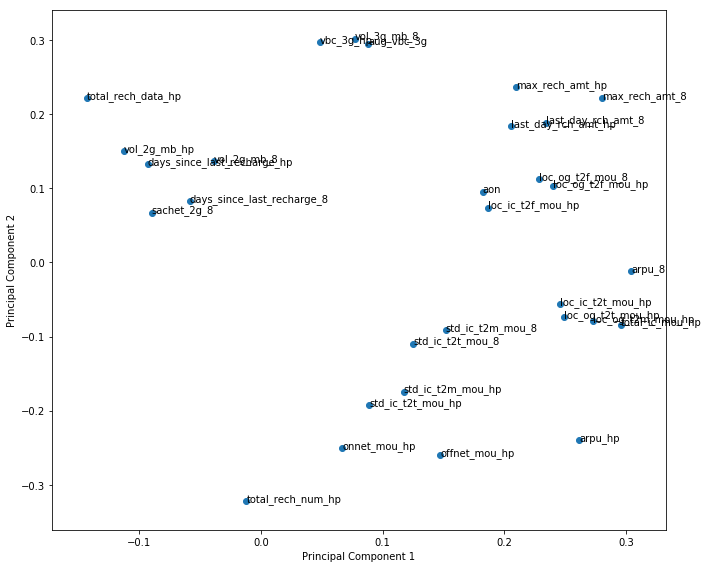

In [177]:
# Viewing the PCA components
%matplotlib inline
fig = plt.figure(figsize = (10,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

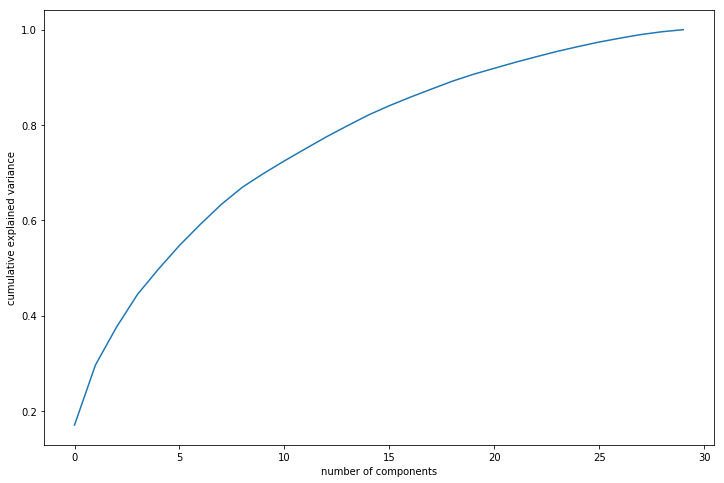

In [178]:
# Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### As per the graph we can choose around 21 components 

In [179]:
# Using incremental PCA for efficiency 
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=21)

In [180]:
df_train_pca = pca_final.fit_transform(X_train)
df_train_pca.shape

(24031, 21)

In [181]:
# Creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

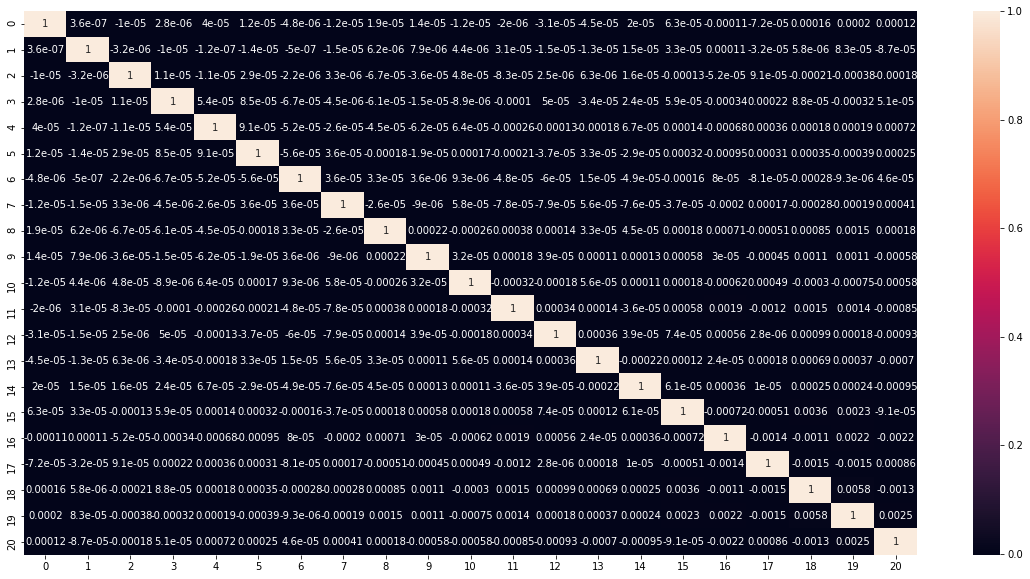

In [182]:
# Plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [183]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.00577975884019602 , min corr:  -0.002229547079959476


In [184]:
X_test = scaler.fit_transform(X_test_1)

In [185]:
# Applying selected components to the test data - 19 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(10299, 21)

### Model Selection

### Logistic Regression

In [186]:
# Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [187]:
# Making prediction on the test dhttp://localhost:8888/notebooks/Study/Blog/ChurnScore/Churn%20Score.ipynb#ata
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.88'

In [188]:
y_pred_class = model_pca.predict(df_test_pca)

In [189]:
# Confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)


array([[4211,  956],
       [ 954, 4178]], dtype=int64)

In [190]:
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[4211  956]
 [ 954 4178]]


In [191]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)

sensitivity 0.8141075604053001


In [192]:
specificity = TN / float(TN + FP)
print("specificity",specificity)

specificity 0.8149796787304044


In [193]:
precision = TP / float(TP + FP)
print("precision",precision)
print(metrics.precision_score(y_test, y_pred_class))

precision 0.8137904168289832
0.8137904168289832


In [194]:
print("precision",precision)
print("PRECISION SCORE :",metrics.precision_score(y_test, y_pred_class))
print("RECALL SCORE :", metrics.recall_score(y_test, y_pred_class))
print("F1 SCORE :",metrics.f1_score(y_test, y_pred_class))

precision 0.8137904168289832
PRECISION SCORE : 0.8137904168289832
RECALL SCORE : 0.8141075604053001
F1 SCORE : 0.8139489577245277


In [195]:
# Trying PCA with 0.95
pca_again = PCA(0.95)

In [196]:
df_train_pca2 = pca_again.fit_transform(X_train)
df_train_pca2.shape


(24031, 24)

In [197]:
# Training the regression model
learner_pca2 = LogisticRegression()
model_pca2 = learner_pca2.fit(df_train_pca2,y_train)

In [198]:
df_test_pca2 = pca_again.transform(X_test)
df_test_pca2.shape

(10299, 24)

In [199]:
# Making prediction on the test data
pred_probs_test2 = model_pca2.predict_proba(df_test_pca2)[:,1]
"{:2.2f}".format(metrics.roc_auc_score(y_test, pred_probs_test2))

'0.88'

In [200]:
y_train_series=pd.Series(y_train) 

#### Choosing 21 PCA Components as with 24 columns also we have same AUC score

```Viewing the data in 2d using 2 components```

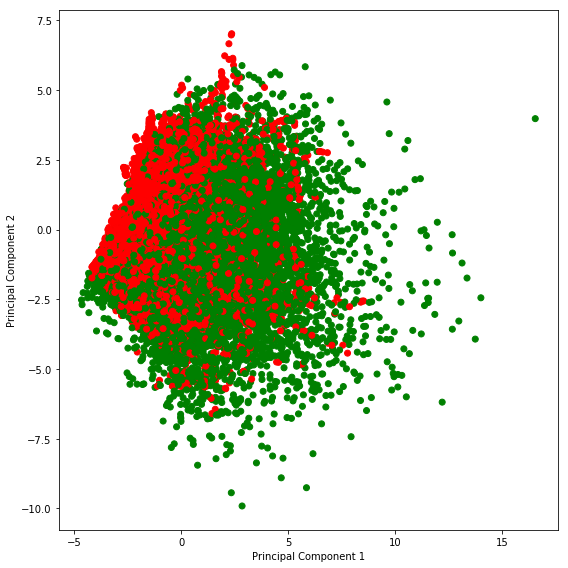

In [202]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train_series.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

```Viewing the data in 3d using 3 components, for better visualization```

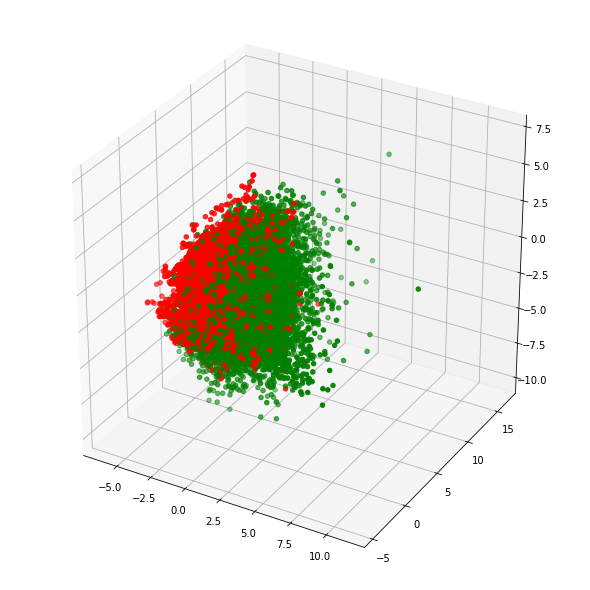

In [203]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,8))
ax = Axes3D(fig)
# ax = plt.axes(projection='3d')
ax.scatter(df_train_pca[:,2], df_train_pca[:,0], df_train_pca[:,1], c=y_train_series.map({0:'green',1:'red'}))

In [204]:
print("pca.explained_variance_ratio_: ",pca.explained_variance_ratio_.round(3)*100)

pca.explained_variance_ratio_:  [17.  12.6  7.9  6.9  5.3  5.   4.4  4.2  3.6  2.9  2.7  2.5  2.5  2.3
  2.3  2.   1.8  1.7  1.7  1.4  1.3  1.3  1.2  1.1  1.   1.   0.8  0.8
  0.6  0.4]


In [205]:
print (pca.explained_variance_ratio_.cumsum())

[0.17034148 0.29649872 0.37573697 0.44446878 0.497598   0.54724866
 0.59173628 0.63358044 0.66952619 0.69809679 0.72465336 0.75012647
 0.77511933 0.79834625 0.82091379 0.8404771  0.85835865 0.87530096
 0.89188201 0.90635385 0.91901955 0.93156236 0.94323085 0.9544985
 0.96461058 0.97413836 0.98229134 0.98990115 0.99577208 1.        ]


In [206]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 17.03,  29.65,  37.57,  44.44,  49.75,  54.72,  59.17,  63.35,
        66.94,  69.8 ,  72.46,  75.01,  77.51,  79.83,  82.09,  84.05,
        85.84,  87.53,  89.19,  90.64,  91.91,  93.16,  94.33,  95.46,
        96.47,  97.42,  98.24,  99.  ,  99.59, 100.01])

### Decison Trees

##### Tuning hyperparametrs

In [207]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [208]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_1,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:   31.8s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': range(5, 15, 5), 'min_samples_leaf': range(50, 150, 50), 'min_samples_split': range(50, 150, 50), 'criterion': ['entropy', 'gini']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [209]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0  0.366988       0.028128      0.001603         0.000486         
1  0.350871       0.003624      0.001807         0.000395         
2  0.361821       0.024286      0.001600         0.000482         
3  0.359996       0.015926      0.002001         0.000001         
4  0.610815       0.013248      0.001807         0.000745         

  param_criterion param_max_depth param_min_samples_leaf  \
0  entropy         5               50                      
1  entropy         5               50                      
2  entropy         5               100                     
3  entropy         5               100                     
4  entropy         10              50                      

  param_min_samples_split  \
0  50                       
1  100                      
2  50                       
3  100                      
4  50                       

                                                                                        params  \
0  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 50}     
1  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 50, 'min_samples_split': 100}    
2  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 50}    
3  {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 100, 'min_samples_split': 100}   
4  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 50}    

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0  0.842937           0.831912           0.839817           0.829553            
1  0.842937           0.831912           0.839817           0.829553            
2  0.837113           0.820054           0.829415           0.827471            
3  0.837113           0.820054           0.829415           0.827471            
4  0.870813           0.866861           0.863948           0.865973            

   split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0  0.844537           0.837751         0.005975        13                
1  0.844537           0.837751         0.005975        13                
2  0.829344           0.828680         0.005440        15                
3  0.829344           0.828680         0.005440        15                
4  0.873673           0.868254         0.003510        1                 

   split0_train_score  split1_train_score  split2_train_score  \
0  0.844309            0.843373            0.848731             
1  0.844309            0.843373            0.848731             
2  0.835570            0.836090            0.835154             
3  0.835570            0.836090            0.835154             
4  0.887328            0.885768            0.882803             

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0  0.841725            0.840060            0.843640          0.002930         
1  0.841725            0.840060            0.843640          0.002930         
2  0.834755            0.829970            0.834308          0.002214         
3  0.834755            0.829970            0.834308          0.002214         
4  0.885104            0.881827            0.884566          0.001999

In [210]:
# Printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.8682535058882277
DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [211]:
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100)
clf_gini.fit(X_train_1,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [212]:
# Calculating Gini score
clf_gini.score(X_test_1,y_test)

0.8737741528303719

In [213]:
from sklearn.metrics import classification_report,confusion_matrix
y_pred = clf_gini.predict(X_test_1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      5167
           1       0.86      0.90      0.88      5132

   micro avg       0.87      0.87      0.87     10299
   macro avg       0.87      0.87      0.87     10299
weighted avg       0.87      0.87      0.87     10299



In [214]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[4393  774]
 [ 526 4606]]


In [215]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)

sensitivity 0.8975058456742011
specificity 0.8502032126959551
precision 0.8561338289962825


In [216]:
# Importing required packages for visualization
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

# Putting features
features = list(X_train_1.columns)

['arpu_8',
 'loc_og_t2f_mou_8',
 'std_ic_t2t_mou_8',
 'std_ic_t2m_mou_8',
 'max_rech_amt_8',
 'last_day_rch_amt_8',
 'vol_2g_mb_8',
 'vol_3g_mb_8',
 'sachet_2g_8',
 'aon',
 'aug_vbc_3g',
 'total_rech_data_hp',
 'total_ic_mou_hp',
 'total_rech_num_hp',
 'std_ic_t2t_mou_hp',
 'onnet_mou_hp',
 'offnet_mou_hp',
 'loc_ic_t2f_mou_hp',
 'loc_og_t2m_mou_hp',
 'arpu_hp',
 'loc_og_t2t_mou_hp',
 'last_day_rch_amt_hp',
 'vol_2g_mb_hp',
 'std_ic_t2m_mou_hp',
 'max_rech_amt_hp',
 'loc_og_t2f_mou_hp',
 'loc_ic_t2t_mou_hp',
 'vbc_3g_hp',
 'days_since_last_recharge_hp',
 'days_since_last_recharge_8']

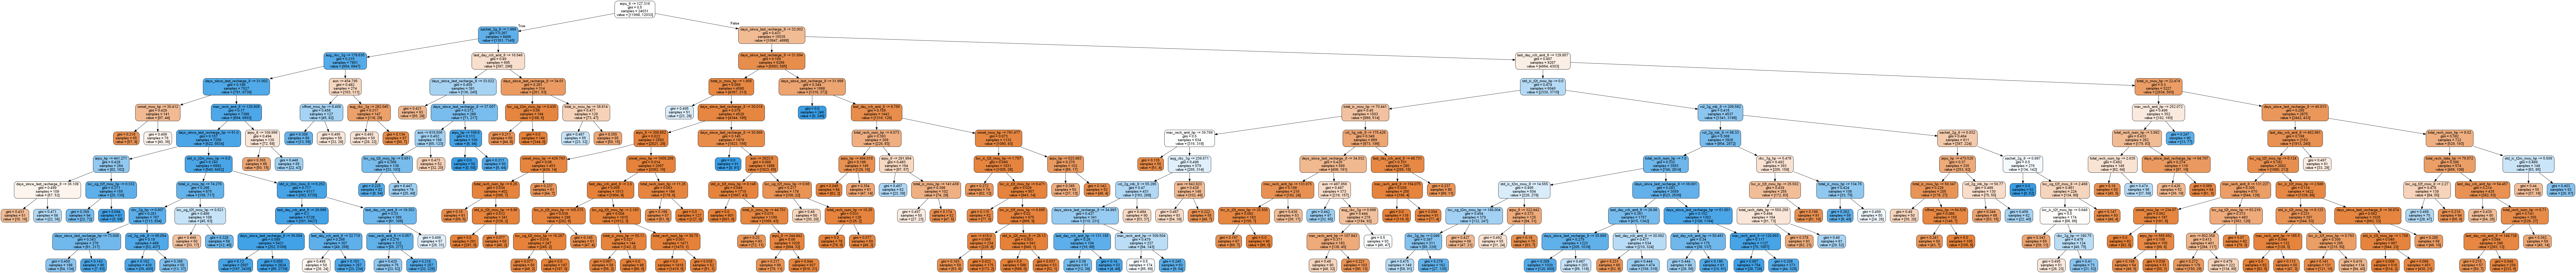

In [217]:
# plotting tree with max_depth=10
dot_data = StringIO()  
export_graphviz(clf_gini, out_file=dot_data,
                feature_names=features, filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [218]:
clf_gini.feature_importances_

array([3.82313776e-01, 3.81971439e-03, 4.30529131e-06, 6.00685900e-03,
       9.47240692e-03, 1.24358991e-01, 1.15557150e-02, 2.34102852e-02,
       3.84869289e-02, 9.29817096e-03, 2.05706221e-02, 3.50773352e-03,
       2.29493922e-02, 1.83868905e-02, 3.77681151e-02, 1.76482850e-03,
       1.19981894e-03, 2.90194683e-03, 2.55653548e-03, 4.47071207e-03,
       1.49019542e-03, 1.71405427e-03, 1.45419023e-03, 3.98571555e-03,
       1.06016856e-02, 4.85108472e-03, 2.21501959e-03, 4.59950628e-03,
       5.50177014e-03, 2.38783031e-01])

In [219]:
df_imp_cols=pd.DataFrame({'Column':X_train_1.columns, 'Importance':clf_gini.feature_importances_})

In [220]:
df_imp_cols.sort_values(by='Importance',ascending=False)

Column  Importance
0   arpu_8                       0.382314  
29  days_since_last_recharge_8   0.238783  
5   last_day_rch_amt_8           0.124359  
8   sachet_2g_8                  0.038487  
14  std_ic_t2t_mou_hp            0.037768  
7   vol_3g_mb_8                  0.023410  
12  total_ic_mou_hp              0.022949  
10  aug_vbc_3g                   0.020571  
13  total_rech_num_hp            0.018387  
6   vol_2g_mb_8                  0.011556  
24  max_rech_amt_hp              0.010602  
4   max_rech_amt_8               0.009472  
9   aon                          0.009298  
3   std_ic_t2m_mou_8             0.006007  
28  days_since_last_recharge_hp  0.005502  
25  loc_og_t2f_mou_hp            0.004851  
27  vbc_3g_hp                    0.004600  
19  arpu_hp                      0.004471  
23  std_ic_t2m_mou_hp            0.003986  
1   loc_og_t2f_mou_8             0.003820  
11  total_rech_data_hp           0.003508  
17  loc_ic_t2f_mou_hp            0.002902  
18  loc_og_t2m_mou_hp            0.002557  
26  loc_ic_t2t_mou_hp            0.002215  
15  onnet_mou_hp                 0.001765  
21  last_day_rch_amt_hp          0.001714  
20  loc_og_t2t_mou_hp            0.001490  
22  vol_2g_mb_hp                 0.001454  
16  offnet_mou_hp                0.001200  
2   std_ic_t2t_mou_8             0.000004

In [221]:
importances = clf_gini.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train_1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

1. feature 0 (0.382314)
2. feature 29 (0.238783)
3. feature 5 (0.124359)
4. feature 8 (0.038487)
5. feature 14 (0.037768)
6. feature 7 (0.023410)
7. feature 12 (0.022949)
8. feature 10 (0.020571)
9. feature 13 (0.018387)
10. feature 6 (0.011556)
11. feature 24 (0.010602)
12. feature 4 (0.009472)
13. feature 9 (0.009298)
14. feature 3 (0.006007)
15. feature 28 (0.005502)
16. feature 25 (0.004851)
17. feature 27 (0.004600)
18. feature 19 (0.004471)
19. feature 23 (0.003986)
20. feature 1 (0.003820)
21. feature 11 (0.003508)
22. feature 17 (0.002902)
23. feature 18 (0.002557)
24. feature 26 (0.002215)
25. feature 15 (0.001765)
26. feature 21 (0.001714)
27. feature 20 (0.001490)
28. feature 22 (0.001454)
29. feature 16 (0.001200)
30. feature 2 (0.000004)


In [222]:
clf_gini= DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train_1, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=15,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [223]:
clf_gini.score(X_test_1,y_test)

0.8801825419943684

In [224]:
y_pred = clf_gini.predict(X_test_1)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      5167
           1       0.88      0.89      0.88      5132

   micro avg       0.88      0.88      0.88     10299
   macro avg       0.88      0.88      0.88     10299
weighted avg       0.88      0.88      0.88     10299



In [225]:
confusion = metrics.confusion_matrix(y_test, y_pred)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[4522  645]
 [ 589 4543]]


In [226]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)

sensitivity 0.8852299298519096
specificity 0.8751693439132959
precision 0.875674633770239


In [227]:
df_imp_cols=pd.DataFrame({'Column':X_train_1.columns, 'Importance':clf_gini.feature_importances_})

In [228]:
df_imp_cols.sort_values(by='Importance',ascending=False)

Column  Importance
0   arpu_8                       0.364827  
29  days_since_last_recharge_8   0.252751  
5   last_day_rch_amt_8           0.120166  
8   sachet_2g_8                  0.036716  
14  std_ic_t2t_mou_hp            0.036014  
7   vol_3g_mb_8                  0.022333  
12  total_ic_mou_hp              0.021893  
10  aug_vbc_3g                   0.019624  
13  total_rech_num_hp            0.018410  
9   aon                          0.013030  
6   vol_2g_mb_8                  0.011080  
24  max_rech_amt_hp              0.010686  
4   max_rech_amt_8               0.009815  
3   std_ic_t2m_mou_8             0.006818  
28  days_since_last_recharge_hp  0.005300  
1   loc_og_t2f_mou_8             0.005092  
25  loc_og_t2f_mou_hp            0.004985  
27  vbc_3g_hp                    0.004810  
19  arpu_hp                      0.004515  
20  loc_og_t2t_mou_hp            0.004036  
23  std_ic_t2m_mou_hp            0.003968  
15  onnet_mou_hp                 0.003780  
11  total_rech_data_hp           0.003766  
16  offnet_mou_hp                0.003152  
17  loc_ic_t2f_mou_hp            0.002864  
18  loc_og_t2m_mou_hp            0.002696  
26  loc_ic_t2t_mou_hp            0.002537  
21  last_day_rch_amt_hp          0.002370  
22  vol_2g_mb_hp                 0.001963  
2   std_ic_t2t_mou_8             0.000004

# RandomForest

#### Tuning hyperParameters

In [229]:
from sklearn.ensemble import RandomForestClassifier
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [230]:
grid_search.fit(X_train_1, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 11.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [231]:
# Printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8687112479713703 using {'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 300}


### Fitting model with above parameters

In [232]:
# Model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=5,
                             n_estimators=300)

In [233]:
rfc.fit(X_train_1,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=100, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [234]:
# Predict
predictions = rfc.predict(X_test_1)

In [235]:
# Evaluation metrics
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      5167
           1       0.89      0.85      0.87      5132

   micro avg       0.87      0.87      0.87     10299
   macro avg       0.87      0.87      0.87     10299
weighted avg       0.87      0.87      0.87     10299



In [236]:
confusion = metrics.confusion_matrix(y_test, predictions)
print(confusion)
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]
TP = confusion[1, 1]

[[4602  565]
 [ 762 4370]]


In [237]:
sensitivity = TP / float(FN + TP)
print("sensitivity",sensitivity)
specificity = TN / float(TN + FP)
print("specificity",specificity)
precision = TP / float(TP + FP)
print("precision",precision)

sensitivity 0.8515198752922837
specificity 0.8906522159860654
precision 0.8855116514690983


### Decisions on Model Selection

#### The logistic regression has higher accuracy than Decision Tree and Random Forest
- Accuracy
    - Logistic - 89
    - Decision Tree - 88
    - Random Forest - 86

### Top Features
- Below are the top features which should be considered

#### Columns in order of their importance
    
    arpu_8
    days_since_last_recharge_8
    last_day_rch_amt_8
    sachet_2g_8
    std_ic_t2t_mou_hp
    vol_3g_mb_8
    total_rech_num_hp
    total_ic_mou_hp
    aug_vbc_3g
    max_rech_amt_8
    days_since_last_recharge_hp

### Actions to be taken
#### arpu_8 - Average revenue per user in action period
        In the action period when the average revenue from  user is varying down , it provide a strong indication that the 
        user is about to churn
#### days_since_last_recharge_8 - No. of days since the user has done recharge in action period
        Keep track of the last recharge day in the Action period. If they are not recharging after a threshold time,
        company should try to provide more exciting offers' information as message or special offers/gift for those users.
#### last_day_rch_amt_8 - Amount of recharge done on the last day in action period
        Check the amount of the recharge done by user, if the user has done recharge , he is likely to continue.
        Else if the user is doing small recharge, they may churn as they no longer want to use the service.
        Company should try to provide more exciting offers to these users
#### sachet_2g_8 - Service schemes with validity smaller than a month for  2g in  Action Period
        Keep track of 2g sachets bought by the user. If user starts buying lesser
        amount of sachets , he is likely to churn.        
#### std_ic_t2t_mou_hp - Minutes of Incoming STD calls  within the network in Happy Period
        User who has low incoming STD call within same network , is likely to churn.
        The user might have taken another mobile no. hence this no. may not be his primary contact now.
####  vol_3g_mb_8 - Volume of 3g recharge done in Action Period
        Check the volume of recharge done for 3g , if the user not is recharging in the amount they used to, 
        company should try to attract them with offers.
#### total_rech_num_hp - No. of recharge done in happy period
        If the frequency of recharge reduced for the user in happy period, he is likely to churn. 
#### total_ic_mou_hp - Minutes of Incoming  calls  in Happy Period
         User who has low incoming call in happy period, is likely to churn.
        The user might have taken another mobile no. hence this no. may not be his primary contact now.
#### aug_vbc_3g - Volume based cost - when no specific scheme is not purchased and paid as per usage in Action Period
         If the vbc for the user descreases , the user is likely to churn
#### max_rech_amt_8 - Max amount of recharge done in Action Period
        If the user has been max recharging amount starts reducing , user is likely to churn
#### days_since_last_recharge_hp - No. of days since the user has done recharge in Happy period
        Keep track of the last recharge day in the Happy period. If they are not recharging after a threshold time,
        company should try to provide more exciting offers' information as message or special offers/gift for those users.
